# PARTIE 1: Importation des fichiers et librairies 

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")


In [ ]:
! pip install pingouin # analyses statistiques

In [ ]:
import pingouin as pg


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import plotly as px
import numpy as np
import missingno as msno # analyse des manquants 
import plotly.graph_objects as go #donut chart
import scipy.stats as scipy


In [ ]:
df_15=pd.read_csv("/content/drive/MyDrive/Projet4_ConsoElec/2015-building-energy-benchmarking.csv")

In [ ]:
df_16=pd.read_csv("/content/drive/MyDrive/Projet4_ConsoElec/2016-building-energy-benchmarking.csv")

### Fonctions pour le Nettoyage des données 


In [ ]:
## FONCTION INFO
def desc_bis (df):
    nb_li = df.index.size
    nb_col = df.columns.size
    tot = nb_li*nb_col   
    infos = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'}) 
    infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
    print("Nb de lignes =", (nb_li))
    print("Nb de colonnes =",(nb_col))
    return infos
    
## FONCTION DE COMPTAGE DES VALEURS NULLES 
def evalNull (inf_df):
    a = inf_df.T['null'].sum()
    b = inf_df.T['count'].sum()
    print("% total valeurs 'null' : {:.1f}%".format(a*100/(a+b)))

# Ensemble de fonctions pour l'analyse pre-exploratoire

## fonction prenant un dataframe en entrée et renvoie le nombre de lignes
def nb_lines(data):
    return len(data)

##fonction prenant un dataframe en entrée et renvoie le nombre de colonnes
def nb_columns(data):
    return len(data.columns)

## fonction prenant un dataframe en entrée et renvoie le nombre de cellules manquantes
def missing_cells(data):
    return data.isna().sum().sum()

## fonction prenant un dataframe en entrée et renvoie le pourcentage de cellules manquantes
def missing_cells_percent(data):
    return data.isna().sum().sum()/(data.size)

## fonction prenant un dataframe en entrée et renvoie le nombre de lignes en double
def count_duplicates_rows(data):
    return len(data)-len(data.drop_duplicates())

## fonction prenant un dataframe en entrée et renvoie le pourcentage de lignes en double
def count_duplicates_rows_percent(data):
    return count_duplicates_rows(data)/nb_lines(data)

##fonction prenant un Dataframe en entrée et imprime un résumé du Dataframe contenant
    #nombre de lignes, de colonnes, de cellules manquantes et de lignes en double

##fonction qui renvoie le nom de la variable dans l'espace de noms
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]
def data_set_overview(data):    
   
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('Nombre de variables (colonnes) : {}'.format(nb_columns(data)))
    print('Nombre d observations (lignes) : {}'.format(nb_lines(data)))
    print('Données manquantes en % : {:.2%}'.format(missing_cells_percent(data)))
    print('Lignes en double : {}'.format(count_duplicates_rows(data)))
    print('Lignes en double en % : {:.2%}'.format(count_duplicates_rows_percent(data)))
    return None  
   

 ##fonction prenant un dataframe en entrée et retourne un résumé contenant
    #nom, type, valeurs distinctes, valeurs manquantes et statistiques numériques de la variable
    #pour les variables numériques         
def dataset_variables_overview(data):
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('--------------------------------------------------------------------------')
    df = pd.DataFrame(columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Stdev', 'min','25%','50%','75%','max', 'Skew', 'Kurtosis', 'Variance'])
    for column in data.columns:
        var_type = data[column].dtypes
        distinct = len(data[column].unique())
        percent_distinct = len(data[column].unique())/len(data[column])
        missing = missing_cells(data[column])
        percent_missing = missing_cells_percent(data[column])
        if var_type != 'object':       
            df = df.append(pd.DataFrame([[column,var_type,distinct,percent_distinct,missing,percent_missing,data[column].mean(),data[column].median(), data[column].std(ddof=0),data[column].min(),data[column].quantile(0.25),data[column].quantile(0.5),data[column].quantile(0.75),data[column].max(), data[column].skew(),data[column].kurtosis(),data[column].var(ddof=0)]], columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Stdev', 'min','25%','50%','75%','max', 'Skew', 'Kurtosis', 'Variance']))
        else:            
            df = df.append(pd.DataFrame([[column,var_type,distinct,percent_distinct,missing,percent_missing,'','','','','','',''
                                    ,'','','','']], columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Stdev', 'min','25%','50%','75%','max', 'Skew', 'Kurtosis', 'Variance']))
               
    return df


In [ ]:
df_15.head(2)
df_15.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [ ]:
inf_df_15= desc_bis(df_15).append(df_15.describe(include='all'))
evalNull(inf_df_15)
inf_df_15

Nb de lignes = 3340
Nb de colonnes = 47
% total valeurs 'null' : 16.9%


OSEBuildingID DataYear    BuildingType   PrimaryPropertyType  \
Type           int64    int64          object                object   
null               0        0               0                     0   
count         3340.0   3340.0            3340                  3340   
unique           NaN      NaN               7                    27   
top              NaN      NaN  NonResidential  Low-Rise Multifamily   
freq             NaN      NaN            1461                   998   
mean    20522.168263   2015.0             NaN                   NaN   
std     11511.515874      0.0             NaN                   NaN   
min              1.0   2015.0             NaN                   NaN   
25%         19921.75   2015.0             NaN                   NaN   
50%          22977.0   2015.0             NaN                   NaN   
75%          25748.0   2015.0             NaN                   NaN   
max          50059.0   2015.0             NaN                   NaN   

       PropertyName TaxParcelIdentificationNumber  \
Type         object                        object   
null              0                             2   
count          3340                          3338   
unique         3287                          3245   
top       WAREHOUSE                     925049346   
freq              9                             5   
mean            NaN                           NaN   
std             NaN                           NaN   
min             NaN                           NaN   
25%             NaN                           NaN   
50%             NaN                           NaN   
75%             NaN                           NaN   
max             NaN                           NaN   

                                                 Location CouncilDistrictCode  \
Type                                               object               int64   
null                                                    0                   0   
count                                                3340              3340.0   
unique                                               3298                 NaN   
top     {'latitude': '47.52593209', 'longitude': '-122...                 NaN   
freq                                                    5                 NaN   
mean                                                  NaN            4.450898   
std                                                   NaN            2.127203   
min                                                   NaN                 1.0   
25%                                                   NaN                 3.0   
50%                                                   NaN                 4.0   
75%                                                   NaN                 7.0   
max                                                   NaN                 7.0   

       Neighborhood   YearBuilt NumberofBuildings NumberofFloors  \
Type         object       int64             int64        float64   
null              0           0                 0              8   
count          3340      3340.0            3340.0         3332.0   
unique           13         NaN               NaN            NaN   
top        DOWNTOWN         NaN               NaN            NaN   
freq            578         NaN               NaN            NaN   
mean            NaN  1967.62485          1.035629       4.682173   
std             NaN   32.949847          0.784463        5.45846   
min             NaN      1900.0               1.0            0.0   
25%             NaN      1947.0               1.0            2.0   
50%             NaN      1973.0               1.0            4.0   
75%             NaN      1996.0               1.0            5.0   
max             NaN      2015.0              39.0           99.0   

       PropertyGFATotal PropertyGFAParking PropertyGFABuilding(s)  \
Type              int64              int64                  int64   
null                  0                  0 

### Jointure des fichiers 2015 et 2016 (pd.concat)

In [ ]:
pd.concat([df_16,df_15])

OSEBuildingID  DataYear          BuildingType    PrimaryPropertyType  \
0                 1      2016        NonResidential                  Hotel   
1                 2      2016        NonResidential                  Hotel   
2                 3      2016        NonResidential                  Hotel   
3                 5      2016        NonResidential                  Hotel   
4                 8      2016        NonResidential                  Hotel   
...             ...       ...                   ...                    ...   
3335          50049      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3336          50055      2015  Multifamily MR (5-9)   Mid-Rise Multifamily   
3337          50057      2015  Multifamily HR (10+)  High-Rise Multifamily   
3338          50058      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3339          50059      2015  Multifamily LR (1-4)   Low-Rise Multifamily   

                     PropertyName          Address     City State  ZipCode  \
0            Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1                 Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2         5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                       HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4     WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   
...                           ...              ...      ...   ...      ...   
3335   PACIFIC CENTER CONDOMINIUM              NaN      NaN   NaN      NaN   
3336           IDENTITY APTS 4123              NaN      NaN   NaN      NaN   
3337                       CIRRUS              NaN      NaN   NaN      NaN   
3338     WEDGEWOOD ESTATES BLDG A              NaN      NaN   NaN      NaN   
3339     WEDGEWOOD ESTATES BLDG B              NaN      NaN   NaN      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
0                       0659000030                    7     DOWNTOWN   
1                       0659000220                    7     DOWNTOWN   
2                       0659000475                    7     DOWNTOWN   
3                       0659000640                    7     DOWNTOWN   
4                       0659000970                    7     DOWNTOWN   
...                            ...                  ...          ...   
3335                    6599950000                    2     DOWNTOWN   
3336                    1142001670                    4    NORTHEAST   
3337                     660000575                    7     DOWNTOWN   
3338                    6392001040                    4    NORTHEAST   
3339                    6392001040                    4    NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
0     47.61220 -122.33799       1927                1.0            12.0   
1     47.61317 -122.33393       1996                1.0            11.0   
2     47.61393 -122.33810       1969                1.0            41.0   
3     47.61412 -122.33664       1926                1.0            10.0   
4     47.61375 -122.34047       1980                1.0            18.0   
...        ...        ...        ...                ...             ...   
3335       NaN        NaN       2000                1.0             4.0   
3336       NaN        NaN       2014                1.0             7.0   
3337       NaN        NaN       2015                1.0            40.0   
3338       NaN        NaN       1981                1.0             3.0   
3339       NaN        NaN       1981                1.0             4.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               956110              196718                  759392   
3                61320                   0                   61320   
4               

In [ ]:
data_m=pd.concat([df_16,df_15])

In [ ]:
data_m[data_m.index.duplicated()]
data_m.reset_index(drop=True, inplace=True)  # reset_index pour éliminer les doublons d'index (faux-doublons) mais posait problème pour les rélaisations graphiques 

In [ ]:
data_m.sort_values(by=["DataYear"], ascending=True)
# pour filtrer les doublons et ne garder que l'update de 2016


OSEBuildingID  DataYear          BuildingType  \
6715          50059      2015  Multifamily LR (1-4)   
4493          20861      2015        NonResidential   
4492          20858      2015  Multifamily MR (5-9)   
4491          20857      2015  Multifamily LR (1-4)   
4490          20851      2015  Multifamily LR (1-4)   
...             ...       ...                   ...   
2233          24888      2016  Multifamily LR (1-4)   
2232          24887      2016  Multifamily LR (1-4)   
2231          24886      2016        NonResidential   
2203          24772      2016  Multifamily LR (1-4)   
3357          50095      2016  Multifamily MR (5-9)   

              PrimaryPropertyType                   PropertyName  \
6715         Low-Rise Multifamily       WEDGEWOOD ESTATES BLDG B   
4493     Residence Hall/Dormitory            KEYSTONE GROUP HOME   
4492         Mid-Rise Multifamily                UNION BAY LOFTS   
4491         Low-Rise Multifamily  EASTLAKE GARDEN APTS & RETAIL   
4490         Low-Rise Multifamily              L' AMOURITA CO-OP   
...                           ...                            ...   
2233        Senior Care Community                   Cannon House   
2232         Low-Rise Multifamily       Monica's Village Place 1   
2231  Small- and Mid-Sized Office                            RCC   
2203         Low-Rise Multifamily     Heritage Place Condominium   
3357         Mid-Rise Multifamily                 Broadstone Sky   

                    Address     City State  ZipCode  \
6715                    NaN      NaN   NaN      NaN   
4493                    NaN      NaN   NaN      NaN   
4492                    NaN      NaN   NaN      NaN   
4491                    NaN      NaN   NaN      NaN   
4490                    NaN      NaN   NaN      NaN   
...                     ...      ...   ...      ...   
2233         113 23rd Ave S  Seattle    WA  98144.0   
2232  140 23rd Avenue South  Seattle    WA  98144.0   
2231         100 23RD AVE S  Seattle    WA  98144.0   
2203      12027 15th Ave NE  Seattle    WA  98125.0   
3357       4745 40th Ave SW  Seattle    WA  98116.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
6715                    6392001040                    4    NORTHEAST   
4493                    1825049055                    4   LAKE UNION   
4492                    1959703145                    3    NORTHEAST   
4491                    1959703130                    3    NORTHEAST   
4490                    1959702631                    4   LAKE UNION   
...                            ...                  ...          ...   
2233                    3646100065                    3      CENTRAL   
2232                   55696400000                    3      CENTRAL   
2231                    3646100005                    3      CENTRAL   
2203                    3260500000                    5        North   
3357                    7579200395                    1    SOUTHWEST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
6715       NaN        NaN       1981                1.0             4.0   
4493       NaN        NaN       1988                1.0             3.0   
4492       NaN        NaN       2008                1.0             6.0   
4491       NaN        NaN       1997                1.0             3.0   
4490       NaN        NaN       1914                1.0             3.0   
...        ...        ...        ...                ...             ...   
2233  47.60073 -122.30257       2001                1.0             4.0   
2232  47.60058 -122.30170       2010                1.0             4.0   
2231  47.60104 -122.30155       1971                1.0             2.0   
2203  47.71642 -122.31292       1980                1.0             4.0   
3357  47.55976 -122.38320       2015                1.0             7.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
6715             53100         

In [ ]:
data_m.sort_values(by=["YearBuilt"], ascending=True)

OSEBuildingID  DataYear          BuildingType  \
5322          23854      2015        NonResidential   
464             625      2016        NonResidential   
3595            340      2015        NonResidential   
3594            339      2015        NonResidential   
2410          25553      2016        NonResidential   
...             ...       ...                   ...   
3328          50050      2016  Multifamily MR (5-9)   
3331          50056      2016  Multifamily MR (5-9)   
3332          50083      2016  Multifamily MR (5-9)   
3319          50035      2016        NonResidential   
3357          50095      2016  Multifamily MR (5-9)   

              PrimaryPropertyType                     PropertyName  \
5322                 Restaurant\n             PIER 57 BAY PAVILION   
464                  Large Office               2200 Equities, LLC   
3595  Small- and Mid-Sized Office                 PIONEER BUILDING   
3594  Small- and Mid-Sized Office               BRODERICK BUILDING   
2410                        Hotel   J & M HOTEL BUILDING (ID25553)   
...                           ...                              ...   
3328         Mid-Rise Multifamily  Cue Apartments (Whole-Building)   
3331         Mid-Rise Multifamily                     Kebero Court   
3332         Mid-Rise Multifamily         Smith & Burns Apartments   
3319                        Hotel        Hilton Garden Inn Seattle   
3357         Mid-Rise Multifamily                   Broadstone Sky   

                    Address     City State  ZipCode  \
5322                    NaN      NaN   NaN      NaN   
464   2200 1st Avenue South  Seattle    WA  98134.0   
3595                    NaN      NaN   NaN      NaN   
3594                    NaN      NaN   NaN      NaN   
2410          210 1St Ave S  Seattle    WA  98104.0   
...                     ...      ...   ...      ...   
3328       1525 Harvard Ave  Seattle    WA  98122.0   
3331          1105 E Fir St  Seattle    WA  98122.0   
3332   4455 Interlake Ave N  Seattle    WA  98103.0   
3319         1821 Boren Ave  Seattle    WA  98101.0   
3357       4745 40th Ave SW  Seattle    WA  98116.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
5322                    7666202435                    7          DOWNTOWN   
464                     7666206220                    2  GREATER DUWAMISH   
3595                     939000150                    7          DOWNTOWN   
3594                     939000130                    7          DOWNTOWN   
2410                    5247800130                    7          DOWNTOWN   
...                            ...                  ...               ...   
3328                    6003000550                    3              EAST   
3331                    9826700260                    3              EAST   
3332                    7821200210                    4        LAKE UNION   
3319                    3374400010                    7          DOWNTOWN   
3357                    7579200395                    1         SOUTHWEST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
5322       NaN        NaN       1900                1.0             1.0   
464   47.58361 -122.33369       1900                1.0             4.0   
3595       NaN        NaN       1900                1.0             6.0   
3594       NaN        NaN       1900                1.0             7.0   
2410  47.60035 -122.33379       1900                1.0             3.0   
...        ...        ...        ...                ...             ...   
3328  47.61508 -122.32243       2015                1.0             7.0   
3331  47.60246 -122.31771       2015                1.0             6.0   
3332  47.66111 -122.34106       2015                1.0             5.0   
3319  47.61665 -122.33261       2015                1.0            14.0   
3357  47.55976 -122.38320       2015                1.0             7.0   

      PropertyGFA

In [ ]:
# J'élimine les doublons 'OSEBuildingID'en gardant celui de 2016
data_m.drop_duplicates(subset=["OSEBuildingID"], keep='last', inplace=True)

In [ ]:
data_m[data_m.index.duplicated()]
data_m.reset_index(drop=True, inplace=True)

In [ ]:
data_m.DataYear.value_counts()

2015    3340
2016      92
Name: DataYear, dtype: int64

In [ ]:
inf_data_m = desc_bis(data_m).append(data_m.describe(include='all'))
evalNull(inf_data_m)
inf_data_m

Nb de lignes = 3432
Nb de colonnes = 56
% total valeurs 'null' : 30.2%


OSEBuildingID     DataYear    BuildingType   PrimaryPropertyType  \
Type           int64        int64          object                object   
null               0            0               0                     0   
count         3432.0       3432.0            3432                  3432   
unique           NaN          NaN               8                    31   
top              NaN          NaN  NonResidential  Low-Rise Multifamily   
freq             NaN          NaN            1487                  1008   
mean    21184.746795  2015.026807             NaN                   NaN   
std     12211.835092     0.161541             NaN                   NaN   
min              1.0       2015.0             NaN                   NaN   
25%         19974.25       2015.0             NaN                   NaN   
50%          23109.5       2015.0             NaN                   NaN   
75%          25976.5       2015.0             NaN                   NaN   
max          50226.0       2016.0             NaN                   NaN   

       PropertyName                Address     City   State       ZipCode  \
Type         object                 object   object  object       float64   
null              0                   3340     3340    3340          3356   
count          3432                     92       92      92          76.0   
unique         3379                     92        1       1           NaN   
top       WAREHOUSE  7755 E MARGINAL WAY S  Seattle      WA           NaN   
freq              9                      1       92      92           NaN   
mean            NaN                    NaN      NaN     NaN  98125.039474   
std             NaN                    NaN      NaN     NaN      30.52581   
min             NaN                    NaN      NaN     NaN       98101.0   
25%             NaN                    NaN      NaN     NaN       98105.0   
50%             NaN                    NaN      NaN     NaN       98115.0   
75%             NaN                    NaN      NaN     NaN       98122.0   
max             NaN                    NaN      NaN     NaN       98195.0   

       TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood  \
Type                          object               int64       object   
null                               2                   0            0   
count                           3430              3432.0         3432   
unique                          3322                 NaN           14   
top                       1625049001                 NaN     DOWNTOWN   
freq                               8                 NaN          587   
mean                             NaN             4.44697          NaN   
std                              NaN            2.120142          NaN   
min                              NaN                 1.0          NaN   
25%                              NaN                 3.0          NaN   
50%                              NaN                 4.0          NaN   
75%                              NaN                 7.0          NaN   
max                              NaN                 7.0          NaN   

         Latitude   Longitude   YearBuilt NumberofBuildings NumberofFloors  \
Type      float64     float64       int64           float64        float64   
null         3340        3340           0                 1              8   
count        92.0        92.0      3432.0            3431.0         3424.0   
unique        NaN         NaN         NaN               NaN            NaN   
top           NaN         NaN         NaN               NaN            NaN   
freq          NaN         NaN         NaN               NaN            NaN   
mean    47.629541 -122.328474  1968.36014          1.069076       4.698306   
std      0.044156    0.026678   33.182901          2.032005       5.460756   
min      47.52832  -122.39228      1900.0               1.0            0.0   
25%     47.612938 -122.341207      1948.0               1.0            2.0

In [ ]:
data_set_overview(data_m)

--------------------------------------------------------------------------
Data : ['data_m']
Nombre de variables (colonnes) : 56
Nombre d observations (lignes) : 3432
Données manquantes en % : 30.21%
Lignes en double : 0
Lignes en double en % : 0.00%


## Exploration contenu des variables


### Localité des bâtiments 
Sont-ils tous à Seattle ? 

In [ ]:
data_m.ZipCode.unique()  #len=23 ZipCode différents (normal, il y en a 60 au total pour Seattle)

array([98108., 98195., 98185., 98101., 98115., 98112., 98121., 98102.,
       98119., 98134., 98103., 98105., 98122., 98125., 98107., 98118.,
       98109., 98116., 98104., 98155., 98133., 98144.,    nan])

In [ ]:
data_m.head(10)
# si on regarde de plus près pour les zip code, les quartiers sont tous référencés (aucun manquants) et tous les quartiers appartiennent à Seattle!

OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
0             43      2016                Campus    Mixed Use Property   
1            364      2016        NonResidential          Large Office   
2            365      2016        NonResidential                 Other   
3            750      2016        NonResidential          Large Office   
4          19456      2016  Multifamily LR (1-4)  Low-Rise Multifamily   
5          20585      2016  Multifamily LR (1-4)  Low-Rise Multifamily   
6          20978      2016        NonResidential                 Other   
7          21103      2016        NonResidential                 Hotel   
8          21860      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
9          23437      2016  Multifamily LR (1-4)  Low-Rise Multifamily   

                               PropertyName                    Address  \
0                              Plant 2 Site      7755 E MARGINAL WAY S   
1                     UW Tower Bldg Complex          4333 Brooklyn Ave   
2                      UW Tower Data Center       4333 BROOKLYN AVE NE   
3  Children's Hospital Research Building #2             1915 Terry Ave   
4                                       MOD           6559 35th Ave NE   
5                         Anhalt Apartments                1600 E John   
6                            Terreno Lucile            637 S LUCILE ST   
7                           Palladian Hotel         2000 Second Avenue   
8                53236 - Equinox Apartments  1524 Eastlake Avenue East   
9                          MERCER CREST APT            500 W MERCER ST   

      City State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0  Seattle    WA  98108.0                    0022000005                    2   
1  Seattle    WA  98195.0                    1142000280                    4   
2  Seattle    WA  98185.0                    1142000290                    4   
3  Seattle    WA  98101.0                    0660001255                    7   
4  Seattle    WA  98115.0                    0425049047                    4   
5  Seattle    WA  98112.0                    1806900395                    3   
6  Seattle    WA  98108.0                    1722800223                    2   
7  Seattle    WA  98121.0                    1977201140                    7   
8  Seattle    WA  98102.0                    2366500000                    4   
9  Seattle    WA  98119.0                    3876900230                    7   

            Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0       GREATER DUWAMISH  47.53493 -122.31788       1992                1.0   
1              NORTHEAST  47.66072 -122.31466       1971                1.0   
2              NORTHEAST  47.66060 -122.31512       1969                1.0   
3               DOWNTOWN  47.61628 -122.33391       1953                1.0   
4              NORTHEAST  47.67723 -122.29126       1965                5.0   
5                   EAST  47.61991 -122.31095       2015                2.0   
6       GREATER DUWAMISH  47.55297 -122.32472       1976                1.0   
7               DOWNTOWN  47.61203 -122.34165       1910                1.0   
8             LAKE UNION  47.63300 -122.32507       2009                1.0   
9  MAGNOLIA / QUEEN ANNE  47.62479 -122.36364       1957                NaN   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0             3.0            494835                   0   
1            23.0            474546                   0   
2             5.0             36000                   0   
3             7.0            274362                   0   
4             2.0             62900                   0   
5             3.0             29848                6555   
6             1.0             47105                   0   
7             8.0             61721                   0   
8             8.0            322771              109495   
9             4.0             23

In [ ]:
data_m.City.unique()
data_m.State.unique()

array(['WA', nan], dtype=object)

In [ ]:
list(data_m.ZipCode.unique())

[98108.0,
 98195.0,
 98185.0,
 98101.0,
 98115.0,
 98112.0,
 98121.0,
 98102.0,
 98119.0,
 98134.0,
 98103.0,
 98105.0,
 98122.0,
 98125.0,
 98107.0,
 98118.0,
 98109.0,
 98116.0,
 98104.0,
 98155.0,
 98133.0,
 98144.0,
 nan]

In [ ]:
list_ZipCodes_Seattle=[98108.0,
 98195.0,
 98185.0,
 98101.0,
 98115.0,
 98112.0,
 98121.0,
 98102.0,
 98119.0,
 98134.0,
 98103.0,
 98105.0,
 98122.0,
 98125.0,
 98107.0,
 98118.0,
 98109.0,
 98116.0,
 98104.0,
 98155.0,
 98133.0,
 98144.0,
 'nan']

In [ ]:
data_m['Zip Codes'].unique() # len=30 "Zip Codes" différents mais ne correspondent pas à Seattle!
# Pourtant les qurtiers sont tous référencés (aucun nan): ce serait le Zipcode qui est faux 

array([   nan, 18081., 19576., 18379., 18800., 18383., 18789., 19579.,
       18390., 18377., 18235., 18792., 18386., 17919., 19575., 19578.,
       19581., 19582., 17920., 18385., 18388., 19584., 18798., 17916.,
       18795., 17923., 17926., 18229., 18376., 18230.])

In [ ]:
data_m['Zip Codes'].value_counts()
#il y en a beaucoup avec code postal différent de seattle 

18390.0    309
18379.0    259
19578.0    238
18081.0    234
18383.0    189
19584.0    182
19576.0    180
19575.0    164
18376.0    163
18377.0    158
19579.0    155
18388.0    135
19582.0    124
18792.0    124
18386.0    106
18795.0     94
17919.0     93
18800.0     90
18789.0     72
18235.0     70
19581.0     62
18385.0     62
18798.0     31
17916.0     29
18229.0      7
17920.0      4
18230.0      3
17926.0      2
17923.0      1
Name: Zip Codes, dtype: int64

In [ ]:
data_m.sort_values(by=["CouncilDistrictCode"], ascending=True).head()

OSEBuildingID  DataYear          BuildingType  \
2605          25770      2015  Multifamily LR (1-4)   
251             257      2015        NonResidential   
2225          24494      2015  Multifamily LR (1-4)   
2226          24495      2015  Multifamily LR (1-4)   
2227          24496      2015  Multifamily LR (1-4)   

             PrimaryPropertyType                           PropertyName  \
2605        Low-Rise Multifamily                          PARK HAMILTON   
251   Non-Refrigerated Warehouse  HARBOR ISLAND WAREHOUSE - KING COUNTY   
2225        Low-Rise Multifamily                         WESTRIDGE PARK   
2226        Low-Rise Multifamily                         WESTHAVEN APTS   
2227        Low-Rise Multifamily                 2429 SW HOLDEN ST APTS   

     Address City State  ZipCode TaxParcelIdentificationNumber  \
2605     NaN  NaN   NaN      NaN                    9274200145   
251      NaN  NaN   NaN      NaN                    7666703020   
2225     NaN  NaN   NaN      NaN                    7985400009   
2226     NaN  NaN   NaN      NaN                    7985400045   
2227     NaN  NaN   NaN      NaN                    7985400055   

      CouncilDistrictCode      Neighborhood  Latitude  Longitude  YearBuilt  \
2605                    1         SOUTHWEST       NaN        NaN       1966   
251                     1  GREATER DUWAMISH       NaN        NaN       1916   
2225                    1          DELRIDGE       NaN        NaN       1990   
2226                    1          DELRIDGE       NaN        NaN       1987   
2227                    1          DELRIDGE       NaN        NaN       2009   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
2605                1.0             4.0             39757                3690   
251                 1.0             4.0             79600                   0   
2225                1.0             2.0             95865                   0   
2226                1.0             3.0            155600                   0   
2227                1.0             3.0             32405                2402   

      PropertyGFABuilding(s)   ListOfAllPropertyUseTypes  \
2605                   36067         Multifamily Housing   
251                    79600  Non-Refrigerated Warehouse   
2225                   95865                         NaN   
2226                  155600         Multifamily Housing   
2227                   30003         Multifamily Housing   

          LargestPropertyUseType  LargestPropertyUseTypeGFA  \
2605         Multifamily Housing                    36067.0   
251   Non-Refrigerated Warehouse                    79600.0   
2225                         NaN                        NaN   
2226         Multifamily Housing                   150000.0   
2227         Multifamily Housing                    32405.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
2605                          NaN                              NaN   
251                           NaN                              NaN   
2225                          NaN                              NaN   
2226                          NaN                              NaN   
2227                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
2605                         NaN                             NaN   
251                          NaN                             NaN   
2225                         NaN                             NaN   
2226                         NaN                             NaN   
2227                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
2605                      NaN             68.0              27.0   
251                       NaN             55.0              22.4   
2225                      NaN             68.0              27.1   
2226                   

In [ ]:
data_m.Neighborhood.unique() # 14 quartiers  aucun nan
#https://ufeseattle3.azurewebsites.net/les-quartiers-de-seattle/

array(['GREATER DUWAMISH', 'NORTHEAST', 'DOWNTOWN', 'EAST', 'LAKE UNION',
       'MAGNOLIA / QUEEN ANNE', 'NORTHWEST', 'NORTH', 'BALLARD',
       'SOUTHEAST', 'SOUTHWEST', 'CENTRAL', 'DELRIDGE NEIGHBORHOODS',
       'DELRIDGE'], dtype=object)

In [ ]:
data=data_m.sort_values(by=["Zip Codes"], ascending=True)

In [ ]:
dataset_Seattle=data_m.loc[data_m['ZipCode'].isin(list_ZipCodes_Seattle)]

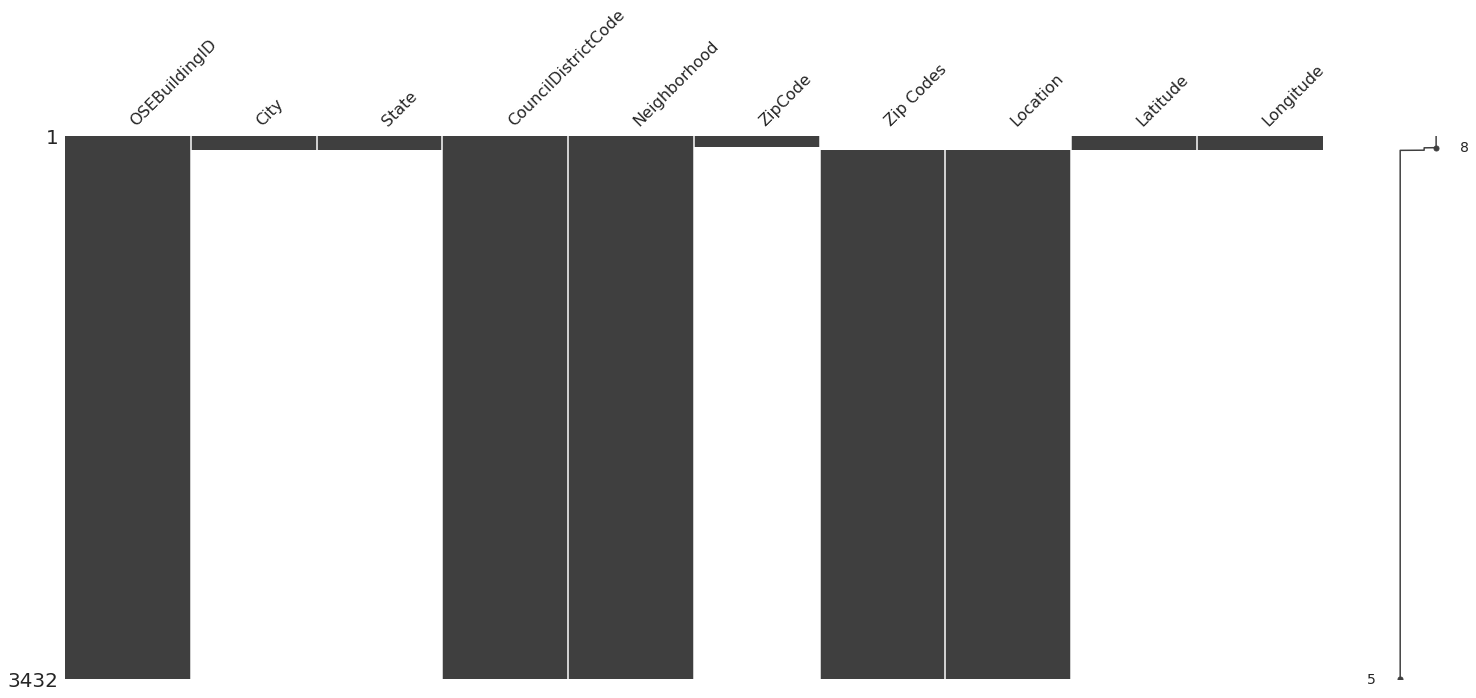

In [ ]:
#pour vérifier les localisations : à dispatcher
data_m.sort_values(by='Zip Codes', ascending=True).head(50)
data_m.Longitude.unique()

data_m.Location.unique()
data_location=data_m[['OSEBuildingID', 'City', 'State', 'CouncilDistrictCode', 'Neighborhood','ZipCode','Zip Codes', 'Location', 'Latitude', 'Longitude']]
msno.matrix(data_location)
#quand ce n'est pas renseigné dans location, les coordonnées sont dans latitude et longitude. 
#il suffit de voir à quoi correspond les nan pour vérifier si tous les relevés concernent seattle : toutes les locations correspondent à Seattle
#quand les zip code sont différents de ceux de seattle, les coordonnées sont renseignées comme étant de seattle, quartiers également  

### Exploration des autres variables type objet ou "int"

In [ ]:
dataset_variables_overview(data_m)

--------------------------------------------------------------------------
Data : ['data_m']
--------------------------------------------------------------------------


Variable name Variable type Distinct  \
0                                      OSEBuildingID         int64     3432   
0                                           DataYear         int64        2   
0                                       BuildingType        object        8   
0                                PrimaryPropertyType        object       31   
0                                       PropertyName        object     3379   
0                                            Address        object       93   
0                                               City        object        2   
0                                              State        object        2   
0                                            ZipCode       float64       23   
0                      TaxParcelIdentificationNumber        object     3323   
0                                CouncilDistrictCode         int64        7   
0                                       Neighborhood        object       14   
0                                           Latitude       float64       92   
0                                          Longitude       float64       92   
0                                          YearBuilt         int64      113   
0                                  NumberofBuildings       float64       13   
0                                     NumberofFloors       float64       51   
0                                   PropertyGFATotal         int64     3237   
0                                 PropertyGFAParking         int64      934   
0                             PropertyGFABuilding(s)         int64     3230   
0                          ListOfAllPropertyUseTypes        object      457   
0                             LargestPropertyUseType        object       58   
0                          LargestPropertyUseTypeGFA       float64     3062   
0                       SecondLargestPropertyUseType        object       48   
0                    SecondLargestPropertyUseTypeGFA       float64     1314   
0                        ThirdLargestPropertyUseType        object       44   
0                     ThirdLargestPropertyUseTypeGFA       float64      491   
0                           YearsENERGYSTARCertified        object       64   
0                                    ENERGYSTARScore       float64      101   
0                                   SiteEUI(kBtu/sf)       float64     1144   
0                                 SiteEUIWN(kBtu/sf)       float64     1181   
0                                 SourceEUI(kBtu/sf)       float64     1753   
0                               SourceEUIWN(kBtu/sf)       float64     1764   
0                                SiteEnergyUse(kBtu)       float64     3418   
0                              SiteEnergyUseWN(kBtu)       float64     3406   
0                                     SteamUse(kBtu)       float64      134   
0                                   Electricity(kWh)       float64     3418   
0                                  Electricity(kBtu)       float64     3420   
0                                 NaturalGas(therms)       float64     2067   
0                                   NaturalGas(kBtu)       float64     2145   
0                                        DefaultData        object        5   
0                                           Comments       float64        1   
0                                   ComplianceStatus        object        4   
0                                            Outlier        object        5   
0                                  TotalGHGEmissions       float64       91   
0                              GHGEmissionsIntensity       float64       77   
0                                           Location        object     3299   
0                                 OtherFuelUse(kBtu)       float64       19   
0                       GHGEmissions(MetricTonsCO2e)       float64     2764   
0                  GHGEmissionsIntensity(kgCO2e/ft2)       float64      472   
0         

In [ ]:
data_m.Comment.unique() # commentaire sur les constructions en cours : conso susceptibles d'évoluer 
#len(data_m.Comment.unique()) #14 commentaires

array([nan,
       'Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.',
       "Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com.",
       "One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs.  Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re",
       'Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu',
       'Construction completed in mid 2015. The building was unoccupied for most of 2015.',
 

In [ ]:
data_m.TaxParcelIdentificationNumber.unique()  

array(['0022000005', '1142000280', '1142000290', ..., '6599950000',
       '1142001670', '660000575'], dtype=object)

In [ ]:
data_m['2010 Census Tracts'].unique()

array([ nan, 124., 116., 123., 134., 131., 127., 117., 129., 135., 119.,
       118., 122., 125.])

In [ ]:
data_m['SPD Beats'].unique()

array([nan, 31.,  7., 19., 20., 43., 38., 12., 10.,  6., 29., 39.,  3.,
       48., 37., 27.,  1., 41., 25.,  9., 24., 30., 40., 17., 50., 32.,
       51., 13., 42., 47., 33.,  2., 22., 11., 46.,  8., 44., 16., 23.,
       28., 34., 45., 21., 36., 14., 18., 49., 15., 26., 35.,  5.,  4.])

In [ ]:
data_m.sort_values(by=['SteamUse(kBtu)'], ascending=False).head(10)


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
713             828      2015  NonResidential            Hospital   
262             276      2015  NonResidential            Hospital   
16            49967      2016          Campus          University   
3397          49940      2015  NonResidential            Hospital   
354             389      2015  NonResidential               Hotel   
3289          45927      2015  NonResidential               Other   
95                5      2015  NonResidential               Hotel   
590             675      2015  NonResidential      Medical Office   
468             525      2015  NonResidential  Mixed Use Property   
94                3      2015  NonResidential               Hotel   

                                           PropertyName  \
713   SWEDISH HOSPITAL MEDICAL CENTER First Hill Campus   
262                           HARBORVIEW MEDICAL CENTER   
16            University of Washington - Seattle Campus   
3397                  VIRGINIA MASON- CENTRAL PAVILLION   
354                              FAIRMONT OLYMPIC HOTEL   
3289        RESEARCH AND TRAINING BUILDING (HARBORVIEW)   
95                                            HOTEL MAX   
590                 NINTH & JEFFERSON BLDG - HARBORVIEW   
468                                  SEATTLE ART MUSEUM   
94                                         WESTIN HOTEL   

                        Address     City State  ZipCode  \
713                         NaN      NaN   NaN      NaN   
262                         NaN      NaN   NaN      NaN   
16    NE 45th St & Brooklyn Ave  Seattle    WA  98105.0   
3397                        NaN      NaN   NaN      NaN   
354                         NaN      NaN   NaN      NaN   
3289                        NaN      NaN   NaN      NaN   
95                          NaN      NaN   NaN      NaN   
590                         NaN      NaN   NaN      NaN   
468                         NaN      NaN   NaN      NaN   
94                          NaN      NaN   NaN      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
713                     1978201096                    3         EAST   
262                     8590900220                    3         EAST   
16                      1625049001                    4    NORTHEAST   
3397                    1979200210                    3         EAST   
354                        2400003                    7     DOWNTOWN   
3289                    8590900220                    3         EAST   
95                       659000640                    7     DOWNTOWN   
590                     8590400545                    3         EAST   
468                     1974700010                    7     DOWNTOWN   
94                       659000475                    7     DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
713        NaN        NaN       1994                1.0            14.0   
262        NaN        NaN       2000                1.0             8.0   
16    47.65644 -122.31041       1900              111.0             0.0   
3397       NaN        NaN       1920                1.0             8.0   
354        NaN        NaN       1923                1.0            12.0   
3289       NaN        NaN       2000                1.0             8.0   
95         NaN        NaN       1926                1.0            10.0   
590        NaN        NaN       2008                1.0            15.0   
468        NaN        NaN       1991                1.0             6.0   
94         NaN        NaN       1969                1.0            41.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
713            1765970                   0                 1765970   
262            1158691                   0                 1158691   
16             9320156                   0                 9320156   
3397            374466                   0     

In [ ]:
dataset_variables_overview(data_m)

--------------------------------------------------------------------------
Data : ['data_m']
--------------------------------------------------------------------------


Variable name Variable type Distinct  \
0                                      OSEBuildingID         int64     3432   
0                                           DataYear         int64        2   
0                                       BuildingType        object        8   
0                                PrimaryPropertyType        object       31   
0                                       PropertyName        object     3379   
0                                            Address        object       93   
0                                               City        object        2   
0                                              State        object        2   
0                                            ZipCode       float64       23   
0                      TaxParcelIdentificationNumber        object     3323   
0                                CouncilDistrictCode         int64        7   
0                                       Neighborhood        object       14   
0                                           Latitude       float64       92   
0                                          Longitude       float64       92   
0                                          YearBuilt         int64      113   
0                                  NumberofBuildings       float64       13   
0                                     NumberofFloors       float64       51   
0                                   PropertyGFATotal         int64     3237   
0                                 PropertyGFAParking         int64      934   
0                             PropertyGFABuilding(s)         int64     3230   
0                          ListOfAllPropertyUseTypes        object      457   
0                             LargestPropertyUseType        object       58   
0                          LargestPropertyUseTypeGFA       float64     3062   
0                       SecondLargestPropertyUseType        object       48   
0                    SecondLargestPropertyUseTypeGFA       float64     1314   
0                        ThirdLargestPropertyUseType        object       44   
0                     ThirdLargestPropertyUseTypeGFA       float64      491   
0                           YearsENERGYSTARCertified        object       64   
0                                    ENERGYSTARScore       float64      101   
0                                   SiteEUI(kBtu/sf)       float64     1144   
0                                 SiteEUIWN(kBtu/sf)       float64     1181   
0                                 SourceEUI(kBtu/sf)       float64     1753   
0                               SourceEUIWN(kBtu/sf)       float64     1764   
0                                SiteEnergyUse(kBtu)       float64     3418   
0                              SiteEnergyUseWN(kBtu)       float64     3406   
0                                     SteamUse(kBtu)       float64      134   
0                                   Electricity(kWh)       float64     3418   
0                                  Electricity(kBtu)       float64     3420   
0                                 NaturalGas(therms)       float64     2067   
0                                   NaturalGas(kBtu)       float64     2145   
0                                        DefaultData        object        5   
0                                           Comments       float64        1   
0                                   ComplianceStatus        object        4   
0                                            Outlier        object        5   
0                                  TotalGHGEmissions       float64       91   
0                              GHGEmissionsIntensity       float64       77   
0                                           Location        object     3299   
0                                 OtherFuelUse(kBtu)       float64       19   
0                       GHGEmissions(MetricTonsCO2e)       float64     2764   
0                  GHGEmissionsIntensity(kgCO2e/ft2)       float64      472   
0         

In [ ]:
data_m['PropertyGFABuilding(s)'].unique()

array([494835, 474546,  36000, ..., 277566,  48230,  53100])

In [ ]:
data_m.LargestPropertyUseTypeGFA.unique()  # c'est le GFA regroupé dans 3 catégories de surface (les plus grandes, les secondes plus grandes et 3eme )

array([757027., 474546.,  36000., ...,  31748.,  22310.,  25265.])

In [ ]:
data_m['SteamUse(kBtu)'].describe()
#c'est de l'énergie utilisée hors habitation 

count    3.420000e+03
mean     2.710933e+05
std      3.731837e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.278697e+08
Name: SteamUse(kBtu), dtype: float64

In [ ]:
data_m.Outlier.value_counts()

High Outlier    46
Low Outlier     38
High outlier     1
Low outlier      1
Name: Outlier, dtype: int64

In [ ]:
data_m.sort_values(by='Outlier', ascending=False)
#que faire des outliers ? drop ? 

OSEBuildingID  DataYear          BuildingType  \
57            50071      2016  Multifamily MR (5-9)   
1888          23377      2015  Multifamily LR (1-4)   
1444          21562      2015  Multifamily LR (1-4)   
1669          22446      2015        NonResidential   
1703          22674      2015  Multifamily LR (1-4)   
...             ...       ...                   ...   
3427          50049      2015  Multifamily LR (1-4)   
3428          50055      2015  Multifamily MR (5-9)   
3429          50057      2015  Multifamily HR (10+)   
3430          50058      2015  Multifamily LR (1-4)   
3431          50059      2015  Multifamily LR (1-4)   

              PrimaryPropertyType                        PropertyName  \
57           Mid-Rise Multifamily           The Westside Off Broadway   
1888         Low-Rise Multifamily                          APARTMENTS   
1444         Low-Rise Multifamily                DIPLOMAT CONDOMINIUM   
1669  Small- and Mid-Sized Office  SALTY DOG POTTERY & THE BOATWRIGHT   
1703         Low-Rise Multifamily                         CURTIS BLDG   
...                           ...                                 ...   
3427         Low-Rise Multifamily          PACIFIC CENTER CONDOMINIUM   
3428         Mid-Rise Multifamily                  IDENTITY APTS 4123   
3429        High-Rise Multifamily                              CIRRUS   
3430         Low-Rise Multifamily            WEDGEWOOD ESTATES BLDG A   
3431         Low-Rise Multifamily            WEDGEWOOD ESTATES BLDG B   

              Address     City State  ZipCode TaxParcelIdentificationNumber  \
57    801 E Thomas St  Seattle    WA  98102.0                    6003501185   
1888              NaN      NaN   NaN      NaN                    7660100105   
1444              NaN      NaN   NaN      NaN                    2041200000   
1669              NaN      NaN   NaN      NaN                    2768303115   
1703              NaN      NaN   NaN      NaN                    2767703065   
...               ...      ...   ...      ...                           ...   
3427              NaN      NaN   NaN      NaN                    6599950000   
3428              NaN      NaN   NaN      NaN                    1142001670   
3429              NaN      NaN   NaN      NaN                     660000575   
3430              NaN      NaN   NaN      NaN                    6392001040   
3431              NaN      NaN   NaN      NaN                    6392001040   

      CouncilDistrictCode      Neighborhood  Latitude  Longitude  YearBuilt  \
57                      3              EAST  47.62107 -122.32156       2015   
1888                    2  GREATER DUWAMISH       NaN        NaN       1963   
1444                    1         SOUTHWEST       NaN        NaN       1975   
1669                    6           BALLARD       NaN        NaN       1903   
1703                    6           BALLARD       NaN        NaN       1911   
...                   ...               ...       ...        ...        ...   
3427                    2          DOWNTOWN       NaN        NaN       2000   
3428                    4         NORTHEAST       NaN        NaN       2014   
3429                    7          DOWNTOWN       NaN        NaN       2015   
3430                    4         NORTHEAST       NaN        NaN       1981   
3431                    4         NORTHEAST       NaN        NaN       1981   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
57                  1.0             7.0             41384               15062   
1888                1.0             4.0             20467                   0   
1444                1.0             4.0             33948                   0   
1669                1.0             3.0             24913                   0   
1703                1.0             4.0             30200                   0   
...                 ...             ...               ...                 ...   
342

In [ ]:
data_m.Comments.unique() # à droper

array([nan])

###Informations et Classification des bâtiments 


In [ ]:
data_m.YearBuilt.unique()


array([1992, 1971, 1969, 1953, 1965, 2015, 1976, 1910, 2009, 1957, 1950,
       1925, 2012, 2014, 1900, 2011, 1998, 1970, 1955, 1929, 2013, 1962,
       2005, 2010, 1949, 1911, 1972, 1952, 1912, 1994, 1960, 1982, 1990,
       2004, 1974, 1989, 1938, 1927, 1996, 1926, 1980, 1999, 1904, 1928,
       1922, 1930, 1983, 1907, 1916, 1985, 1961, 2001, 1991, 1978, 1906,
       1954, 1973, 1920, 1908, 1959, 2000, 1997, 2008, 1948, 1986, 2002,
       1923, 2003, 1964, 1941, 1963, 2006, 1915, 1958, 2007, 1951, 1937,
       1966, 1968, 1924, 1909, 1931, 1914, 1913, 1917, 1995, 1981, 1988,
       1979, 1947, 1984, 1956, 1977, 1921, 1945, 1975, 1946, 1967, 1987,
       1940, 1932, 1993, 1918, 1905, 1902, 1939, 1944, 1942, 1903, 1901,
       1919, 1936, 1935])

In [ ]:
data_m.PropertyGFATotal.unique() #surface totale du bâtiment (inclue parkins)
 

array([494835, 474546,  36000, ..., 319481,  48230,  53100])

In [ ]:
data_m.LargestPropertyUseTypeGFA.unique() # les surfaces les plus grandes : il y a 3 groupes de bâtiments en fonction de leur taille (les plus grands: 139, 2nd:1820 et 3eme:2853 bâtiments  )

array([757027., 474546.,  36000., ...,  31748.,  22310.,  25265.])

In [ ]:
len(data_m['LargestPropertyUseType'].unique()) # types de bâtiments (classification la plus large : n=58)
data_m['LargestPropertyUseType'].unique()

array(['Office', 'Data Center', 'Multifamily Housing',
       'Manufacturing/Industrial Plant', nan,
       'Non-Refrigerated Warehouse', 'Residence Hall/Dormitory',
       'College/University', 'Senior Care Community', 'Hotel', 'Parking',
       'Other - Recreation', 'K-12 School', 'Laboratory',
       'Prison/Incarceration', 'Police Station',
       'Other - Entertainment/Public Assembly', 'Library',
       'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'Automobile Dealership',
       'Self-Storage Facility', 'Retail Store', 'Medical Office',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Other/Specialty Hospital',
       'Financial Office', 'Distribution Center', 'Worship Facility',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Cl

In [ ]:
data_m['LargestPropertyUseType'].value_counts()

Multifamily Housing                                     1638
Office                                                   491
Non-Refrigerated Warehouse                               197
K-12 School                                              137
Other                                                    104
Retail Store                                              99
Hotel                                                     70
Worship Facility                                          70
Distribution Center                                       52
Medical Office                                            43
Senior Care Community                                     43
Supermarket/Grocery Store                                 37
Other - Recreation                                        31
Parking                                                   29
Self-Storage Facility                                     27
College/University                                        25
Residence Hall/Dormitory

In [ ]:
data_m.PrimaryPropertyType.unique() # types de bâtiments 

array(['Mixed Use Property', 'Large Office', 'Other',
       'Low-Rise Multifamily', 'Hotel', 'Mid-Rise Multifamily',
       'Warehouse', 'Residence Hall', 'University',
       'Senior Care Community', 'High-Rise Multifamily',
       'Small- and Mid-Sized Office', 'K-12 School', 'Office',
       'College/University', 'Self-Storage Facility\n',
       'Distribution Center', 'Retail Store', 'Medical Office',
       'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'Restaurant\n', 'Restaurant'],
      dtype=object)

In [ ]:
data_m.ListOfAllPropertyUseTypes.unique()

array(['Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office',
       'Office', 'Data Center', 'Multifamily Housing, Parking',
       'Multifamily Housing', 'Manufacturing/Industrial Plant', 'Hotel',
       nan, 'Non-Refrigerated Warehouse, Office',
       'Residence Hall/Dormitory',
       'Residence Hall/Dormitory, Supermarket/Grocery Store',
       'College/University', 'Parking, Residence Hall/Dormitory',
       'Parking, Senior Care Community',
       'Multifamily Housing, Parking, Restaurant',
       'Multifamily Housing, Office, Parking, Restaurant, Retail Store',
       'Office, Parking, Restaurant', 'Office, Parking',
       'Automobile Dealership, Parking',
       'Multifamily Housing, Parking, Retail Store',
       'Office, Parking, Retail Store', 'Hotel, Parking, Swimming Pool',
       'Non-Refrigerated Warehouse', 'Other - Recreation',
       'Multifamily Housing, Other - Restaurant/Bar, Parking, Personal Services (Health/Bea

In [ ]:
data_multihouse=data_m.loc[(data_m['ListOfAllPropertyUseTypes']=='Multifamily Housing')]

In [ ]:
len(data_multihouse) # ce sont les multifamily sans aucun autre type d'occupation. Les autres types de multifamily incluent des occupations non_residentielles

875

In [ ]:
data_m.ListOfAllPropertyUseTypes.value_counts()

Multifamily Housing                                                         875
Multifamily Housing, Parking                                                427
Office                                                                      138
K-12 School                                                                 133
Office, Parking                                                             114
                                                                           ... 
Office, Other, Other - Restaurant/Bar, Parking                                1
Office, Performing Arts, Restaurant, Retail Store, Self-Storage Facility      1
Office, Other - Entertainment/Public Assembly, Other - Mall, Restaurant       1
Medical Office, Parking, Retail Store                                         1
Multifamily Housing, Office, Other, Parking, Performing Arts, Restaurant      1
Name: ListOfAllPropertyUseTypes, Length: 456, dtype: int64

In [ ]:
data_m.PrimaryPropertyType.value_counts()

Low-Rise Multifamily           1008
Mid-Rise Multifamily            568
Small- and Mid-Sized Office     299
Other                           271
Non-Refrigerated Warehouse      187
Large Office                    177
K-12 School                     137
Mixed Use Property              132
High-Rise Multifamily           106
Retail Store                    100
Hotel                            76
Worship Facility                 72
Distribution Center\n            51
Senior Care Community            44
Medical Office                   43
Supermarket/Grocery Store        36
Self-Storage Facility\n          27
College/University               22
Residence Hall/Dormitory         15
Refrigerated Warehouse           13
Restaurant\n                     11
Hospital                         10
Residence Hall                    8
University                        4
SPS-District K-12                 4
Office                            3
Warehouse                         3
Distribution Center         

In [ ]:
data_m.BuildingType.value_counts() # classification des bâtiments 
#variable à nettoyer 

NonResidential          1487
Multifamily LR (1-4)    1040
Multifamily MR (5-9)     585
Multifamily HR (10+)     110
SPS-District K-12         99
Nonresidential COS        86
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [ ]:
dataset_variables_overview(data_m)

--------------------------------------------------------------------------
Data : ['data_m']
--------------------------------------------------------------------------


Variable name Variable type Distinct  \
0                                      OSEBuildingID         int64     3432   
0                                           DataYear         int64        2   
0                                       BuildingType        object        8   
0                                PrimaryPropertyType        object       31   
0                                       PropertyName        object     3379   
0                                            Address        object       93   
0                                               City        object        2   
0                                              State        object        2   
0                                            ZipCode       float64       23   
0                      TaxParcelIdentificationNumber        object     3323   
0                                CouncilDistrictCode         int64        7   
0                                       Neighborhood        object       14   
0                                           Latitude       float64       92   
0                                          Longitude       float64       92   
0                                          YearBuilt         int64      113   
0                                  NumberofBuildings       float64       13   
0                                     NumberofFloors       float64       51   
0                                   PropertyGFATotal         int64     3237   
0                                 PropertyGFAParking         int64      934   
0                             PropertyGFABuilding(s)         int64     3230   
0                          ListOfAllPropertyUseTypes        object      457   
0                             LargestPropertyUseType        object       58   
0                          LargestPropertyUseTypeGFA       float64     3062   
0                       SecondLargestPropertyUseType        object       48   
0                    SecondLargestPropertyUseTypeGFA       float64     1314   
0                        ThirdLargestPropertyUseType        object       44   
0                     ThirdLargestPropertyUseTypeGFA       float64      491   
0                           YearsENERGYSTARCertified        object       64   
0                                    ENERGYSTARScore       float64      101   
0                                   SiteEUI(kBtu/sf)       float64     1144   
0                                 SiteEUIWN(kBtu/sf)       float64     1181   
0                                 SourceEUI(kBtu/sf)       float64     1753   
0                               SourceEUIWN(kBtu/sf)       float64     1764   
0                                SiteEnergyUse(kBtu)       float64     3418   
0                              SiteEnergyUseWN(kBtu)       float64     3406   
0                                     SteamUse(kBtu)       float64      134   
0                                   Electricity(kWh)       float64     3418   
0                                  Electricity(kBtu)       float64     3420   
0                                 NaturalGas(therms)       float64     2067   
0                                   NaturalGas(kBtu)       float64     2145   
0                                        DefaultData        object        5   
0                                           Comments       float64        1   
0                                   ComplianceStatus        object        4   
0                                            Outlier        object        5   
0                                  TotalGHGEmissions       float64       91   
0                              GHGEmissionsIntensity       float64       77   
0                                           Location        object     3299   
0                                 OtherFuelUse(kBtu)       float64       19   
0                       GHGEmissions(MetricTonsCO2e)       float64     2764   
0                  GHGEmissionsIntensity(kgCO2e/ft2)       float64      472   
0         

## Nettoyage des variables 

In [ ]:
## Nettoyage des variables categ / integer

data_m.ComplianceStatus.unique() #conformité des bâtiments # je vais droper les non conformités 
data_m.ComplianceStatus.value_counts()
data_m.replace('Non-Compliant', 'Not Compliant', inplace=True)
data_m.drop(data_m[data_m['ComplianceStatus']=="Not Compliant"].index, inplace=True)
data_m.drop(data_m[data_m['ComplianceStatus']=="Error - Correct Default Data"].index, inplace=True)
data_m.ComplianceStatus.value_counts()

Compliant    3423
Name: ComplianceStatus, dtype: int64

In [ ]:
data_m.rename(columns={'PropertyGFABuilding(s)': 'PropertyGFABuilding'}, inplace=True)

In [ ]:
data_m.BuildingType.value_counts() #on va grouper ensemble les "non residentiel"
#nettoyage des doublons de la variable catégorielle Building Type 
data_m.replace('Nonresidential WA', 'NonResidential', inplace=True)
data_m.replace('Nonresidential COS', 'NonResidential', inplace=True)
data_m.replace('SPS-District K-12', 'Campus', inplace=True) #Student Provisioning Services (SPS) offers a cloud-based data integration system for managing student accounts

In [ ]:
data_m.BuildingType.value_counts()

NonResidential          1571
Multifamily LR (1-4)    1036
Multifamily MR (5-9)     583
Campus                   123
Multifamily HR (10+)     110
Name: BuildingType, dtype: int64

In [ ]:
# Je ne traite pas les habitations résidentielles comme stipulé dans la mission 

data_m = data_m[~data_m['BuildingType'].str.contains("Multifamily")]
data_m['BuildingType'].unique()

array(['Campus', 'NonResidential'], dtype=object)

In [ ]:
data_m.BuildingType.value_counts()

NonResidential    1571
Campus             123
Name: BuildingType, dtype: int64

In [ ]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 0 to 3426
Data columns (total 56 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  1694 non-null   int64  
 1   DataYear                                                       1694 non-null   int64  
 2   BuildingType                                                   1694 non-null   object 
 3   PrimaryPropertyType                                            1694 non-null   object 
 4   PropertyName                                                   1694 non-null   object 
 5   Address                                                        44 non-null     object 
 6   City                                                           44 non-null     object 
 7   State                                                       

## Exploration des outliers (variable outlier )

In [ ]:
#renseigne si le relevé du batiment est un outlier :
data_m.Outlier.unique()
data_m.Outlier.value_counts()

Low Outlier     17
High Outlier    14
Name: Outlier, dtype: int64

In [ ]:
data_m.sort_values(by="Outlier"	, ascending=True).head(100)#voyons si ce sont des valeurs à retirer ou si ils représentent des valeurs correctes de batiments atypiques 


OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
95                5      2015  NonResidential                        Hotel   
3291          48287      2015  NonResidential                 Large Office   
2804          26587      2015  NonResidential  Small- and Mid-Sized Office   
1510          21716      2015  NonResidential  Small- and Mid-Sized Office   
1375          21413      2015  NonResidential  Small- and Mid-Sized Office   
876           19847      2015  NonResidential                 Retail Store   
738            1281      2015  NonResidential                 Large Office   
612             704      2015  NonResidential                 Large Office   
1386          21443      2015  NonResidential  Small- and Mid-Sized Office   
608             700      2015  NonResidential                 Retail Store   
607             696      2015  NonResidential                 Large Office   
320             350      2015  NonResidential                 Large Office   
414             457      2015  NonResidential                 Large Office   
611             703      2015  NonResidential                 Large Office   
3338          49784      2015  NonResidential  Small- and Mid-Sized Office   
3331          49776      2015  NonResidential                 Large Office   
154              87      2015          Campus                  K-12 School   
2886          26849      2015  NonResidential                 Retail Store   
2831          26705      2015  NonResidential  Small- and Mid-Sized Office   
2562          25659      2015  NonResidential  Small- and Mid-Sized Office   
2530          25553      2015  NonResidential                        Hotel   
2058          23912      2015  NonResidential  Small- and Mid-Sized Office   
1669          22446      2015  NonResidential  Small- and Mid-Sized Office   
1452          21578      2015          Campus                  K-12 School   
3347          49793      2015  NonResidential  Small- and Mid-Sized Office   
479             539      2015  NonResidential                 Retail Store   
1331          21315      2015  NonResidential  Small- and Mid-Sized Office   
542             608      2015  NonResidential                 Large Office   
794           19656      2015  NonResidential  Small- and Mid-Sized Office   
2073          23951      2015  NonResidential  Small- and Mid-Sized Office   
3368          49867      2015  NonResidential                 Large Office   
0                43      2016          Campus           Mixed Use Property   
1               364      2016  NonResidential                 Large Office   
2               365      2016  NonResidential                        Other   
3               750      2016  NonResidential                 Large Office   
6             20978      2016  NonResidential                        Other   
7             21103      2016  NonResidential                        Hotel   
10            23964      2016  NonResidential                    Warehouse   
11            24418      2016  NonResidential                    Warehouse   
13            49715      2016  NonResidential               Residence Hall   
14            49716      2016  NonResidential               Residence Hall   
16            49967      2016          Campus                   University   
17            49968      2016  NonResidential                   University   
18            49970      2016  NonResidential               Residence Hall   
19            49972      2016  NonResidential                   University   
20            49979      2016  NonResidential               Residence Hall   
21            49980      2016  NonResidential               Residence Hall   
22            49983      2016  NonResidential               Residence Hall   
37            50026      2016  NonResidential  Small- and Mid-Sized Office   
40            50031      2016  NonResidential                 Large Office   
41            50035      201

In [ ]:
data_m.replace('High outlier', 'High Outlier', inplace=True)

In [ ]:
data_m.replace('Low outlier', 'Low Outlier', inplace=True)

In [ ]:
data_m.Outlier.value_counts()

Low Outlier     17
High Outlier    14
Name: Outlier, dtype: int64

In [ ]:
data_lowOutlier= data_m.loc[(data_m['Outlier']=="Low Outlier")]

In [ ]:
data_HighOutlier= data_m.loc[(data_m['Outlier']=="High Outlier")]

In [ ]:
data_lowOutlier.head(40)

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
154              87      2015          Campus                  K-12 School   
479             539      2015  NonResidential                 Retail Store   
542             608      2015  NonResidential                 Large Office   
794           19656      2015  NonResidential  Small- and Mid-Sized Office   
1331          21315      2015  NonResidential  Small- and Mid-Sized Office   
1452          21578      2015          Campus                  K-12 School   
1669          22446      2015  NonResidential  Small- and Mid-Sized Office   
2058          23912      2015  NonResidential  Small- and Mid-Sized Office   
2073          23951      2015  NonResidential  Small- and Mid-Sized Office   
2530          25553      2015  NonResidential                        Hotel   
2562          25659      2015  NonResidential  Small- and Mid-Sized Office   
2831          26705      2015  NonResidential  Small- and Mid-Sized Office   
2886          26849      2015  NonResidential                 Retail Store   
3331          49776      2015  NonResidential                 Large Office   
3338          49784      2015  NonResidential  Small- and Mid-Sized Office   
3347          49793      2015  NonResidential  Small- and Mid-Sized Office   
3368          49867      2015  NonResidential                 Large Office   

                                        PropertyName Address City State  \
154   ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT)     NaN  NaN   NaN   
479                                UNIVERSITY CENTER     NaN  NaN   NaN   
542          MERRILL PLACE HAMBACH - SELLER BUILDING     NaN  NaN   NaN   
794                              1916 Boren Building     NaN  NaN   NaN   
1331                             1518 5TH AVE OFFICE     NaN  NaN   NaN   
1452                   GENESEE SCHOOL (SPS-DISTRICT)     NaN  NaN   NaN   
1669              SALTY DOG POTTERY & THE BOATWRIGHT     NaN  NaN   NaN   
2058                                          DENSHO     NaN  NaN   NaN   
2073                         ARONSON-CAMPBELL SUPPLY     NaN  NaN   NaN   
2530                            J & M HOTEL BUILDING     NaN  NaN   NaN   
2562                            UNION TRUST BUILDING     NaN  NaN   NaN   
2831                                GREYBAR BUILDING     NaN  NaN   NaN   
2886                                      C & T BLDG     NaN  NaN   NaN   
3331                              MARKET PLACE TOWER     NaN  NaN   NaN   
3338                                  BULLITT CENTER     NaN  NaN   NaN   
3347                             INTERBAY WORK LOFTS     NaN  NaN   NaN   
3368                        HOME PLATE CENTER BLDG B     NaN  NaN   NaN   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
154       NaN                    2518400005                    1   
479       NaN                    5335200380                    4   
542       NaN                    5247800200                    2   
794       NaN                     660002170                    7   
1331      NaN                    1975700135                    7   
1452      NaN                    2095200005                    1   
1669      NaN                    2768303115                    6   
2058      NaN                    3320000165                    3   
2073      NaN                    5084400100                    2   
2530      NaN                    5247800130                    7   
2562      NaN                    5247800360                    7   
2831      NaN                    5247800780                    2   
2886      NaN                    5247802260                    2   
3331      NaN                    1977200471                    7   
3338      NaN                    7234600195                    3   
3347      NaN                    7666201610                    7   
3368      NaN                    7666207075                    2   

               Neighborho

In [ ]:
data_HighOutlier.head(50)


OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
95                5      2015  NonResidential                        Hotel   
320             350      2015  NonResidential                 Large Office   
414             457      2015  NonResidential                 Large Office   
607             696      2015  NonResidential                 Large Office   
608             700      2015  NonResidential                 Retail Store   
611             703      2015  NonResidential                 Large Office   
612             704      2015  NonResidential                 Large Office   
738            1281      2015  NonResidential                 Large Office   
876           19847      2015  NonResidential                 Retail Store   
1375          21413      2015  NonResidential  Small- and Mid-Sized Office   
1386          21443      2015  NonResidential  Small- and Mid-Sized Office   
1510          21716      2015  NonResidential  Small- and Mid-Sized Office   
2804          26587      2015  NonResidential  Small- and Mid-Sized Office   
3291          48287      2015  NonResidential                 Large Office   

                                           PropertyName Address City State  \
95                                            HOTEL MAX     NaN  NaN   NaN   
320                          SECOND AND SPRING BUILDING     NaN  NaN   NaN   
414                              1441 LAKE UNION CENTER     NaN  NaN   NaN   
607                           OCEAN BEAUTY SEAFOODS LLC     NaN  NaN   NaN   
608                                WHOLE FOODS INTERBAY     NaN  NaN   NaN   
611   ELLIOTT WEST BLDG 3 - CELL THEREPEUTICS/ADMIN....     NaN  NaN   NaN   
612                                    401 ELLIOTT WEST     NaN  NaN   NaN   
738                                    4545 15TH AVE NE     NaN  NaN   NaN   
876                      UNIVERSITY VILLAGE EAST BLDG N     NaN  NaN   NaN   
1375                             FHCRC - FAIRVIEW BLDG.     NaN  NaN   NaN   
1386                                         TERRY BLDG     NaN  NaN   NaN   
1510                   223 TAYLOR (TIME WARNER TELECOM)     NaN  NaN   NaN   
2804                                    OFFICE BUILDING     NaN  NaN   NaN   
3291              CENTRAL LINK OPERATIONS & MAINTENANCE     NaN  NaN   NaN   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
95        NaN                     659000640                    7   
320       NaN                     942000045                    7   
414       NaN                    2264501110                    4   
607       NaN                    7666200070                    7   
608       NaN                    7666201460                    7   
611       NaN                    7666202080                    7   
612       NaN                    7666202110                    7   
738       NaN                    8816400020                    4   
876       NaN                     925049426                    4   
1375      NaN                    1984200105                    3   
1386      NaN                    1986200255                    7   
1510      NaN                    1991200270                    7   
2804      NaN                    4088802669                    4   
3291      NaN                    7666203110                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
95                 DOWNTOWN       NaN        NaN       1926   
320                DOWNTOWN       NaN        NaN       1958   
414              LAKE UNION       NaN        NaN       2001   
607   MAGNOLIA / QUEEN ANNE       NaN        NaN       1978   
608   MAGNOLIA / QUEEN ANNE       NaN        NaN       2008   
611   MAGNOLIA / QUEEN ANNE       NaN        NaN       2000   
612   MAGNOLIA / QUEEN ANNE       NaN        NaN       2000   
738               NORTHEAST       NaN        NaN       1960   
876               NORTHEAST       NaN        NaN       1956   
1375         

In [ ]:
data_m['LargestPropertyUseType'].value_counts() # les moins représentés sont souvent outliers : datacenter, prison, laboratories,  hopitaux, food services

Office                                                  487
Non-Refrigerated Warehouse                              197
K-12 School                                             137
Other                                                   100
Retail Store                                             99
Worship Facility                                         70
Hotel                                                    70
Distribution Center                                      52
Medical Office                                           43
Supermarket/Grocery Store                                37
Other - Recreation                                       31
Parking                                                  27
Self-Storage Facility                                    27
College/University                                       24
Residence Hall/Dormitory                                 22
Other - Entertainment/Public Assembly                    20
Senior Care Community                   

In [ ]:
len(data_m['LargestPropertyUseType'].unique())

58

In [ ]:
data_HighOutlier.describe() # les consommations et les surfaces sont plus grandes : il s'agit de Data center, bureaux 

OSEBuildingID  DataYear  ZipCode  CouncilDistrictCode  Latitude  \
count      14.000000      14.0      0.0            14.000000       0.0   
mean    11727.785714    2015.0      NaN             5.500000       NaN   
std     14937.492809       0.0      NaN             1.870829       NaN   
min         5.000000    2015.0      NaN             2.000000       NaN   
25%       697.000000    2015.0      NaN             4.000000       NaN   
50%       992.500000    2015.0      NaN             7.000000       NaN   
75%     21435.500000    2015.0      NaN             7.000000       NaN   
max     48287.000000    2015.0      NaN             7.000000       NaN   

       Longitude    YearBuilt  NumberofBuildings  NumberofFloors  \
count        0.0    14.000000               14.0       14.000000   
mean         NaN  1971.214286                1.0        3.357143   
std          NaN    31.160079                0.0        2.373156   
min          NaN  1926.000000                1.0        1.000000   
25%          NaN  1953.750000                1.0        2.000000   
50%          NaN  1969.000000                1.0        3.000000   
75%          NaN  2000.000000                1.0        4.000000   
max          NaN  2008.000000                1.0       10.000000   

       PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding  \
count         14.000000           14.000000            14.000000   
mean       89770.571429        16831.928571         72938.642857   
std        52840.378312        22010.041780         43478.926205   
min        25862.000000            0.000000         25862.000000   
25%        41895.250000            0.000000         39100.750000   
50%        82508.500000         3031.000000         59248.000000   
75%       125649.250000        38355.000000        100587.750000   
max       172842.000000        55000.000000        162157.000000   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count                  14.000000                         9.000000   
mean                61918.357143                     20484.444444   
std                 29475.179432                     25273.865425   
min                 20434.000000                         0.000000   
25%                 35923.250000                      5000.000000   
50%                 62259.500000                      7557.000000   
75%                 86690.500000                     39336.000000   
max                105100.000000                     72726.000000   

       ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
count                        3.000000        11.000000         14.000000   
mean                     10342.666667         5.000000        249.600000   
std                      12815.606163         9.643651         71.801436   
min                       1250.000000         1.000000        194.500000   
25%                       3014.000000         1.000000        204.325000   
50%                       4778.000000         1.000000        224.650000   
75%                      14889.000000         1.500000        266.050000   
max                      25000.000000        32.000000        460.400000   

       SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
count           14.000000           14.000000             14.000000   
mean           251.514286          648.228571            646.121429   
std             71.506437          166.840912            168.470318   
min            189.200000          418.700000            409.100000   
25%            208.800000          543.950000            544.650000   
50%            222.500000          613.100000            609.100000   
75%            268.525000          692.625000            698.775000   
max            462.500000          955.200000            958.300000   

       SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
count         1.400000e+01           1.400000e+01    1.400000e+01   
mean          1.855997e+07   

In [ ]:
data_lowOutlier.head()

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
154              87      2015          Campus                  K-12 School   
479             539      2015  NonResidential                 Retail Store   
542             608      2015  NonResidential                 Large Office   
794           19656      2015  NonResidential  Small- and Mid-Sized Office   
1331          21315      2015  NonResidential  Small- and Mid-Sized Office   

                                        PropertyName Address City State  \
154   ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT)     NaN  NaN   NaN   
479                                UNIVERSITY CENTER     NaN  NaN   NaN   
542          MERRILL PLACE HAMBACH - SELLER BUILDING     NaN  NaN   NaN   
794                              1916 Boren Building     NaN  NaN   NaN   
1331                             1518 5TH AVE OFFICE     NaN  NaN   NaN   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
154       NaN                    2518400005                    1    SOUTHWEST   
479       NaN                    5335200380                    4    NORTHEAST   
542       NaN                    5247800200                    2     DOWNTOWN   
794       NaN                     660002170                    7     DOWNTOWN   
1331      NaN                    1975700135                    7     DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
154        NaN        NaN       1948                1.0             2.0   
479        NaN        NaN       1987                1.0             2.0   
542        NaN        NaN       1913                1.0             7.0   
794        NaN        NaN       1929                1.0             3.0   
1331       NaN        NaN       1903                1.0             3.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding  \
154              53352                   0                53352   
479              69492                   0                69492   
542             154159                   0               154159   
794              21600                   0                21600   
1331             57720                   0                57720   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
154                K-12 School            K-12 School   
479        Other, Retail Store           Retail Store   
542                     Office                 Office   
794                     Office                 Office   
1331                    Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
154                     53352.0                          NaN   
479                     69800.0                        Other   
542                    193154.0                          NaN   
794                     21600.0                          NaN   
1331                    25000.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
154                               NaN                         NaN   
479                               0.0                         NaN   
542                               NaN                         NaN   
794                               NaN                         NaN   
1331                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
154                              NaN                      NaN   
479                              NaN                      NaN   
542                              NaN                      NaN   
794                              NaN                      NaN   
1331                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
154               NaN               NaN                 NaN   
479             100.0               5.9                 5.9   
542             100.0 

In [ ]:
len(data_m[data_m.LargestPropertyUseType=="Data Center"]) # si on enlève les outliers on enlève la catégories data center.

3

In [ ]:
data_m[data_m.LargestPropertyUseType=="Data Center"].head(10)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
2               365      2016  NonResidential               Other   
652             753      2015  NonResidential               Other   
3335          49780      2015  NonResidential               Other   

              PropertyName               Address     City State  ZipCode  \
2     UW Tower Data Center  4333 BROOKLYN AVE NE  Seattle    WA  98185.0   
652    THE WESTIN BUILDING                   NaN      NaN   NaN      NaN   
3335           DATA CENTER                   NaN      NaN   NaN      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
2                       1142000290                    4    NORTHEAST   
652                      659000950                    7     DOWNTOWN   
3335                     659000905                    7     DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
2      47.6606 -122.31512       1969                1.0             5.0   
652        NaN        NaN       1981                1.0            33.0   
3335       NaN        NaN       1975                1.0             7.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding  \
2                36000                   0                36000   
652             429405                   0               429405   
3335             90679               35120                55559   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
2                  Data Center            Data Center   
652        Data Center, Office            Data Center   
3335      Data Center, Parking            Data Center   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
2                       36000.0                          NaN   
652                    218997.0                       Office   
3335                    60000.0                      Parking   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
2                                 NaN                         NaN   
652                          210409.0                         NaN   
3335                          30700.0                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
2                                NaN         2016201520142013   
652                              NaN                      NaN   
3335                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
2                96.0        834.400024          834.400024   
652              71.0        663.400000          663.400000   
3335              NaN        543.000000          543.000000   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
2                 2620.0                2620.0           30038490.0   
652               2082.3                2082.3          284867168.0   
3335              1705.0                1705.0           32579658.0   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
2                30038490.0             0.0         8803777.0   
652             284867168.0             0.0        83445048.0   
3335             32579658.0             0.0         9548552.0   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu) DefaultData  \
2            30038487.0                 0.0               0.0       False   
652         284726322.0              1526.0          152639.0          No   
3335         32581012.0                 0.0               0.0          No   

      Comments ComplianceStatus Outlier  TotalGHGEmissions  \
2          NaN        Compliant     NaN             209.41   
652        NaN        Compliant     NaN                NaN   
3335       NaN        Compliant     NaN                NaN   

      GHGEmissionsIntensity  \
2                      5.82   
652                     NaN   
3335                    NaN   

                                               Location  Ot

### Données manquantes 
Matrice 

In [ ]:
data_set_overview(data_m)

--------------------------------------------------------------------------
Data : ['data_m']
Nombre de variables (colonnes) : 56
Nombre d observations (lignes) : 1694
Données manquantes en % : 30.21%
Lignes en double : 0
Lignes en double en % : 0.00%


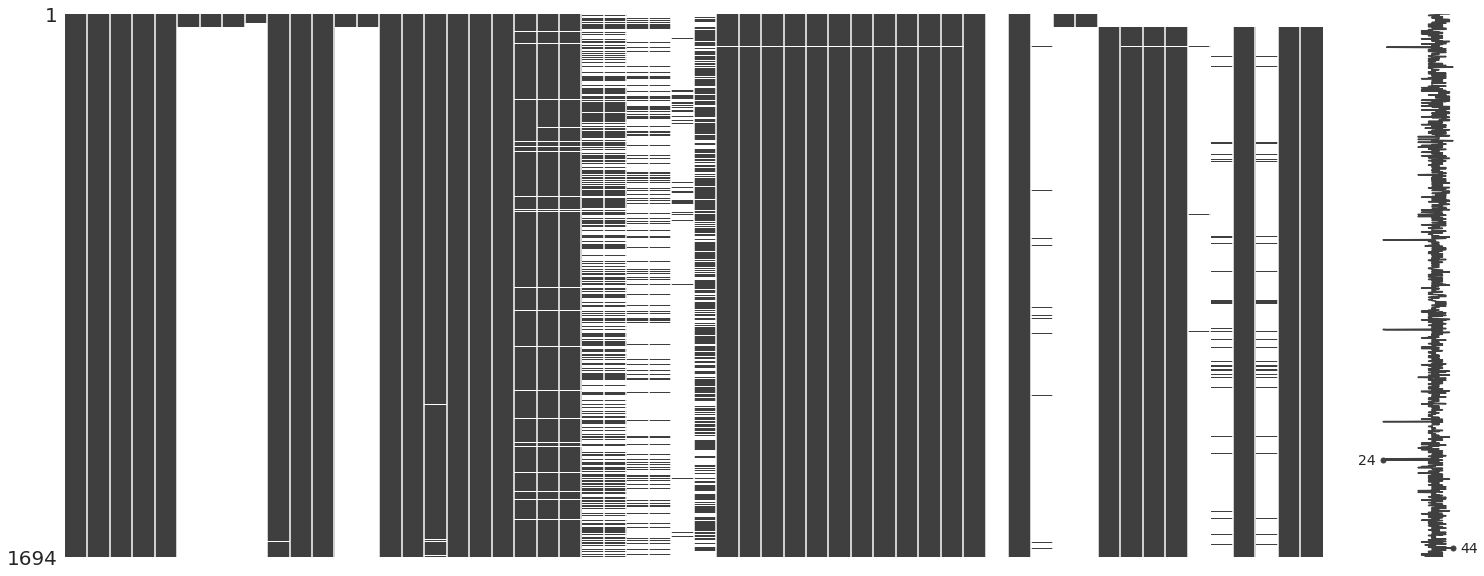

In [ ]:
msno.matrix(data_m)

### Elimination de variables non pertinentes

J'ai pu voir que tous les bâtiments référencés sont bien à Seattle malgré Zip code différent parfois, mais Location et latitude longitude le vérifie: les coorodnnées correspondent à Seattle : je peux donc droper les variables city, zip code, location, latitude et longitude 

In [ ]:
data_m=data_m[['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
        'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts',
       'City Council Districts', 'SPD Beats']]

In [ ]:
data_m.describe()

OSEBuildingID     DataYear  CouncilDistrictCode    YearBuilt  \
count    1694.000000  1694.000000          1694.000000  1694.000000   
mean    16277.397285  2015.025974             4.370720  1961.683589   
std     13753.120637     0.159105             2.191805    32.877715   
min         1.000000  2015.000000             1.000000  1900.000000   
25%       583.250000  2015.000000             2.000000  1930.000000   
50%     21147.500000  2015.000000             4.000000  1965.000000   
75%     24599.750000  2015.000000             7.000000  1989.000000   
max     50226.000000  2016.000000             7.000000  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1694.000000     1686.000000      1.694000e+03   
mean            1.128689        4.125741      1.184637e+05   
std             2.885688        6.533154      2.953021e+05   
min             1.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.940425e+04   
50%             1.000000        2.000000      4.923850e+04   
75%             1.000000        4.000000      1.060308e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding  LargestPropertyUseTypeGFA  \
count         1694.000000         1.694000e+03               1.628000e+03   
mean         13745.249115         1.047184e+05               9.837689e+04   
std          44927.928711         2.801359e+05               2.792011e+05   
min             -2.000000        -5.055000e+04               5.872000e+03   
25%              0.000000         2.840400e+04               2.520000e+04   
50%              0.000000         4.748450e+04               4.296950e+04   
75%              0.000000         9.485325e+04               9.000000e+04   
max         512608.000000         9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       833.000000                      344.000000   
mean                      36506.475390                    14280.773838   
std                       69699.579076                    36672.019735   
min                           0.000000                        0.000000   
25%                        5574.000000                     2492.500000   
50%                       12208.000000                     5806.000000   
75%                       31033.000000                    12087.250000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      1136.000000       1687.000000         1687.000000   
mean         64.258803         72.107173           75.926675   
std          28.664486         73.752903           75.665784   
min           1.000000          0.000000            0.000000   
25%          46.000000         33.100000           36.300000   
50%          72.000000         52.000000           56.000000   
75%          88.000000         82.050000           86.700000   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         1687.000000           1687.000000         1.687000e+03   
mean           177.119917            180.746236         8.486389e+06   
std            184.731070            184.413442         3.017223e+07   
min             -2.000000             -2.000000         0.000000e+00   
25%             77.000000             82.950000         1.223360e+06   
50%            132.000000            135.800000         2.513155e+06   
75%            207.200000            209.850000         6.997546e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           1.687000e+03    1.687000e+03      1.687000e+03   
mean            8.171935e+06    5.119805e+05      1.733176e+06   
std             2.21239

## Sélection et traitement appliqué aux variables

### Clip variables 
et pour quoi pas enlever les valeurs 0 car cela ne veut rien dire !

In [ ]:
#variables à cliper (ne pouvant pas être négatives!)
list_to_clip= ['SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)'	, 'PropertyGFABuilding', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA']


In [ ]:
#je clip les variables continues "_100g" : devant être entre 0 et 100g
for column in list_to_clip:
  data_m[column].clip(lower=0, inplace=True)


In [ ]:
data_m['PropertyGFABuilding'].describe()

count    1.694000e+03
mean     1.047738e+05
std      2.801105e+05
min      0.000000e+00
25%      2.840400e+04
50%      4.748450e+04
75%      9.485325e+04
max      9.320156e+06
Name: PropertyGFABuilding, dtype: float64

### Transformation des variables : 
Pas pour les énergies qui sont binarisées, uniquement pour les autres variables continues à forte asymétrie, avec plusieurs puissances de 10. 
 

Distribution des variables 

In [ ]:
data_m['GHGEmissions(MetricTonsCO2e)'].describe()

count     1643.000000
mean       168.993183
std        566.803048
min          0.000000
25%         19.275000
50%         48.600000
75%        138.055000
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [ ]:
data_m['GHGEmissions(MetricTonsCO2e)'].describe()

count     1643.000000
mean       168.993183
std        566.803048
min          0.000000
25%         19.275000
50%         48.600000
75%        138.055000
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [ ]:
data_m['GHGEmissions(MetricTonsCO2e)'].skew()
#on peut appliquer transformation log

12.732408071302213

In [ ]:
data_m['SiteEnergyUse(kBtu)'].describe()

count    1.687000e+03
mean     8.486389e+06
std      3.017223e+07
min      0.000000e+00
25%      1.223360e+06
50%      2.513155e+06
75%      6.997546e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [ ]:
data_m['SiteEnergyUse(kBtu)'].skew()
#on peut appliquer transformation log

17.976544942771547

In [ ]:
data_m['LargestPropertyUseTypeGFA'].describe()

count    1.628000e+03
mean     9.837689e+04
std      2.792011e+05
min      5.872000e+03
25%      2.520000e+04
50%      4.296950e+04
75%      9.000000e+04
max      9.320156e+06
Name: LargestPropertyUseTypeGFA, dtype: float64

In [ ]:
data_m['LargestPropertyUseTypeGFA'].skew()
#on peut appliquer transformation log

23.137366607757162

In [ ]:
dataset_variables_overview(data_m)

--------------------------------------------------------------------------
Data : ['data_m']
--------------------------------------------------------------------------


Variable name Variable type Distinct  % distinct  \
0                      OSEBuildingID         int64     1694    1.000000   
0                           DataYear         int64        2    0.001181   
0                       BuildingType        object        2    0.001181   
0                PrimaryPropertyType        object       28    0.016529   
0      TaxParcelIdentificationNumber        object     1613    0.952184   
0                CouncilDistrictCode         int64        7    0.004132   
0                       Neighborhood        object       14    0.008264   
0                          YearBuilt         int64      113    0.066706   
0                  NumberofBuildings       float64       11    0.006494   
0                     NumberofFloors       float64       46    0.027155   
0                   PropertyGFATotal         int64     1612    0.951594   
0                 PropertyGFAParking         int64      344    0.203070   
0                PropertyGFABuilding         int64     1604    0.946871   
0          ListOfAllPropertyUseTypes        object      363    0.214286   
0             LargestPropertyUseType        object       58    0.034238   
0          LargestPropertyUseTypeGFA       float64     1527    0.901417   
0       SecondLargestPropertyUseType        object       45    0.026564   
0    SecondLargestPropertyUseTypeGFA       float64      688    0.406139   
0        ThirdLargestPropertyUseType        object       38    0.022432   
0     ThirdLargestPropertyUseTypeGFA       float64      295    0.174144   
0           YearsENERGYSTARCertified        object       61    0.036009   
0                    ENERGYSTARScore       float64      101    0.059622   
0                   SiteEUI(kBtu/sf)       float64     1008    0.595041   
0                 SiteEUIWN(kBtu/sf)       float64     1024    0.604486   
0                 SourceEUI(kBtu/sf)       float64     1333    0.786895   
0               SourceEUIWN(kBtu/sf)       float64     1306    0.770956   
0                SiteEnergyUse(kBtu)       float64     1686    0.995277   
0              SiteEnergyUseWN(kBtu)       float64     1675    0.988784   
0                     SteamUse(kBtu)       float64      117    0.069067   
0                   Electricity(kWh)       float64     1687    0.995868   
0                  Electricity(kBtu)       float64     1687    0.995868   
0                 NaturalGas(therms)       float64     1179    0.695986   
0                   NaturalGas(kBtu)       float64     1210    0.714286   
0                        DefaultData        object        4    0.002361   
0                           Comments       float64        1    0.000590   
0                   ComplianceStatus        object        1    0.000590   
0                            Outlier        object        3    0.001771   
0                  TotalGHGEmissions       float64       45    0.026564   
0              GHGEmissionsIntensity       float64       41    0.024203   
0                 OtherFuelUse(kBtu)       float64       17    0.010035   
0       GHGEmissions(MetricTonsCO2e)       float64     1566    0.924439   
0  GHGEmissionsIntensity(kgCO2e/ft2)       float64      426    0.251476   
0                            Comment        object       13    0.007674   
0                 2010 Census Tracts       float64       13    0.007674   
0             City Council Districts       float64        3    0.001771   
0                          SPD Beats       float64       52    0.030697   

  Missing  % missing            Mean     Median            Stdev     min  \
0       0   0.000000    16277.397285    21147.5     13749.060675       1   
0       0   0.000000     2015.025974     2015.0         0.159058    2015   
0       0   0.000000                                                       
0       0   0.000000                                                       
0       1   0.000590                                                       
0       0   0.000000         4.37072     

Eliminer les valeurs nulles avant transformation log


In [ ]:
#je retire les bâtiments dont la conso totale en énergie ou les émissions sont nulles: 
data_m.drop( data_m[ data_m['SiteEnergyUse(kBtu)'] == 0].index, inplace=True)
data_m.drop( data_m[ data_m['GHGEmissions(MetricTonsCO2e)'] == 0].index, inplace=True) 



In [ ]:
data_m.drop( data_m[ data_m['GHGEmissions(MetricTonsCO2e)'] < 1].index, inplace=True) #sinon j'ai des valeurs négatives avec le log


In [ ]:
data_m.drop( data_m[ data_m['SiteEnergyUse(kBtu)'] < 1].index, inplace=True)

In [ ]:
data_m['GHGEmissions(MetricTonsCO2e)'].describe()

count     1623.000000
mean       171.068965
std        569.976188
min          1.060000
25%         20.080000
50%         49.180000
75%        138.915000
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [ ]:
data_m.describe()

OSEBuildingID     DataYear  CouncilDistrictCode    YearBuilt  \
count    1674.000000  1674.000000          1674.000000  1674.000000   
mean    16234.153524  2015.026284             4.367384  1961.988650   
std     13798.880897     0.160027             2.190980    32.840344   
min         1.000000  2015.000000             1.000000  1900.000000   
25%       579.250000  2015.000000             2.000000  1930.000000   
50%     21139.000000  2015.000000             4.000000  1966.000000   
75%     24598.750000  2015.000000             7.000000  1989.000000   
max     50226.000000  2016.000000             7.000000  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1674.000000     1666.000000      1.674000e+03   
mean            1.130227        4.133854      1.193607e+05   
std             2.902851        6.544243      2.969111e+05   
min             1.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.962200e+04   
50%             1.000000        2.000000      4.948950e+04   
75%             1.000000        4.000000      1.080095e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding  LargestPropertyUseTypeGFA  \
count         1674.000000         1.674000e+03               1.610000e+03   
mean         13901.513740         1.055152e+05               9.907962e+04   
std          45171.662174         2.816639e+05               2.806525e+05   
min              0.000000         0.000000e+00               5.872000e+03   
25%              0.000000         2.857200e+04               2.550525e+04   
50%              0.000000         4.778100e+04               4.336950e+04   
75%              0.000000         9.618925e+04               9.069450e+04   
max         512608.000000         9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       827.000000                      341.000000   
mean                      36727.124547                    14359.405279   
std                       69902.391376                    36821.839162   
min                           0.000000                        0.000000   
25%                        5754.500000                     2500.000000   
50%                       12353.000000                     5775.000000   
75%                       31670.000000                    12349.000000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      1129.000000       1667.000000         1667.000000   
mean         64.065545         72.936293           76.800780   
std          28.638446         73.801877           75.693359   
min           1.000000          2.900000            0.000000   
25%          46.000000         33.650000           36.950000   
50%          72.000000         52.200001           56.600000   
75%          88.000000         82.600000           87.000000   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         1667.000000           1667.000000         1.667000e+03   
mean           179.133653            182.800720         8.587295e+06   
std            184.911976            184.552484         3.033864e+07   
min              0.000000              0.000000         9.385100e+04   
25%             78.600000             85.200000         1.247746e+06   
50%            133.300000            137.300000         2.569602e+06   
75%            207.900000            210.500000         7.018104e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           1.667000e+03    1.667000e+03      1.667000e+03   
mean            8.269053e+06    5.181230e+05      1.753706e+06   
std             2.22385

In [ ]:
list_var_trans_log=data_m[['SiteEnergyUse(kBtu)','LargestPropertyUseTypeGFA', 'GHGEmissions(MetricTonsCO2e)' ]]

In [ ]:
for column in list_var_trans_log:
  data_m["log_"+column]=np.log(data_m[column]) 
  

In [ ]:
data_m.describe()

OSEBuildingID     DataYear  CouncilDistrictCode    YearBuilt  \
count    1674.000000  1674.000000          1674.000000  1674.000000   
mean    16234.153524  2015.026284             4.367384  1961.988650   
std     13798.880897     0.160027             2.190980    32.840344   
min         1.000000  2015.000000             1.000000  1900.000000   
25%       579.250000  2015.000000             2.000000  1930.000000   
50%     21139.000000  2015.000000             4.000000  1966.000000   
75%     24598.750000  2015.000000             7.000000  1989.000000   
max     50226.000000  2016.000000             7.000000  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1674.000000     1666.000000      1.674000e+03   
mean            1.130227        4.133854      1.193607e+05   
std             2.902851        6.544243      2.969111e+05   
min             1.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.962200e+04   
50%             1.000000        2.000000      4.948950e+04   
75%             1.000000        4.000000      1.080095e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding  LargestPropertyUseTypeGFA  \
count         1674.000000         1.674000e+03               1.610000e+03   
mean         13901.513740         1.055152e+05               9.907962e+04   
std          45171.662174         2.816639e+05               2.806525e+05   
min              0.000000         0.000000e+00               5.872000e+03   
25%              0.000000         2.857200e+04               2.550525e+04   
50%              0.000000         4.778100e+04               4.336950e+04   
75%              0.000000         9.618925e+04               9.069450e+04   
max         512608.000000         9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       827.000000                      341.000000   
mean                      36727.124547                    14359.405279   
std                       69902.391376                    36821.839162   
min                           0.000000                        0.000000   
25%                        5754.500000                     2500.000000   
50%                       12353.000000                     5775.000000   
75%                       31670.000000                    12349.000000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      1129.000000       1667.000000         1667.000000   
mean         64.065545         72.936293           76.800780   
std          28.638446         73.801877           75.693359   
min           1.000000          2.900000            0.000000   
25%          46.000000         33.650000           36.950000   
50%          72.000000         52.200001           56.600000   
75%          88.000000         82.600000           87.000000   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         1667.000000           1667.000000         1.667000e+03   
mean           179.133653            182.800720         8.587295e+06   
std            184.911976            184.552484         3.033864e+07   
min              0.000000              0.000000         9.385100e+04   
25%             78.600000             85.200000         1.247746e+06   
50%            133.300000            137.300000         2.569602e+06   
75%            207.900000            210.500000         7.018104e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           1.667000e+03    1.667000e+03      1.667000e+03   
mean            8.269053e+06    5.181230e+05      1.753706e+06   
std             2.22385

In [ ]:
dataset_variables_overview(data_m)

--------------------------------------------------------------------------
Data : ['data_m']
--------------------------------------------------------------------------


Variable name Variable type Distinct  % distinct  \
0                      OSEBuildingID         int64     1674    1.000000   
0                           DataYear         int64        2    0.001195   
0                       BuildingType        object        2    0.001195   
0                PrimaryPropertyType        object       28    0.016726   
0      TaxParcelIdentificationNumber        object     1593    0.951613   
0                CouncilDistrictCode         int64        7    0.004182   
0                       Neighborhood        object       14    0.008363   
0                          YearBuilt         int64      113    0.067503   
0                  NumberofBuildings       float64       11    0.006571   
0                     NumberofFloors       float64       45    0.026882   
0                   PropertyGFATotal         int64     1595    0.952808   
0                 PropertyGFAParking         int64      344    0.205496   
0                PropertyGFABuilding         int64     1587    0.948029   
0          ListOfAllPropertyUseTypes        object      360    0.215054   
0             LargestPropertyUseType        object       58    0.034648   
0          LargestPropertyUseTypeGFA       float64     1514    0.904421   
0       SecondLargestPropertyUseType        object       45    0.026882   
0    SecondLargestPropertyUseTypeGFA       float64      684    0.408602   
0        ThirdLargestPropertyUseType        object       37    0.022103   
0     ThirdLargestPropertyUseTypeGFA       float64      293    0.175030   
0           YearsENERGYSTARCertified        object       60    0.035842   
0                    ENERGYSTARScore       float64      101    0.060335   
0                   SiteEUI(kBtu/sf)       float64      992    0.592593   
0                 SiteEUIWN(kBtu/sf)       float64     1010    0.603345   
0                 SourceEUI(kBtu/sf)       float64     1316    0.786141   
0               SourceEUIWN(kBtu/sf)       float64     1290    0.770609   
0                SiteEnergyUse(kBtu)       float64     1667    0.995818   
0              SiteEnergyUseWN(kBtu)       float64     1658    0.990442   
0                     SteamUse(kBtu)       float64      117    0.069892   
0                   Electricity(kWh)       float64     1668    0.996416   
0                  Electricity(kBtu)       float64     1668    0.996416   
0                 NaturalGas(therms)       float64     1177    0.703106   
0                   NaturalGas(kBtu)       float64     1208    0.721625   
0                        DefaultData        object        4    0.002389   
0                           Comments       float64        1    0.000597   
0                   ComplianceStatus        object        1    0.000597   
0                            Outlier        object        3    0.001792   
0                  TotalGHGEmissions       float64       45    0.026882   
0              GHGEmissionsIntensity       float64       41    0.024492   
0                 OtherFuelUse(kBtu)       float64       16    0.009558   
0       GHGEmissions(MetricTonsCO2e)       float64     1548    0.924731   
0  GHGEmissionsIntensity(kgCO2e/ft2)       float64      425    0.253883   
0                            Comment        object       13    0.007766   
0                 2010 Census Tracts       float64       13    0.007766   
0             City Council Districts       float64        3    0.001792   
0                          SPD Beats       float64       52    0.031063   
0            log_SiteEnergyUse(kBtu)       float64     1667    0.995818   
0      log_LargestPropertyUseTypeGFA       float64     1514    0.904421   
0   log_GHGEmissions(MetricTonsCO2e)       float64     1548    0.924731   

  Missing  % missing            Mean     Median            Stdev        min  \
0       0   0.000000    16234.153524    21139.0     13794.758752          1   
0       0   0.000000     2015.026284     2015.0          0.15998       2015   
0       0   0.000000               

In [ ]:
data_m['log_LargestPropertyUseTypeGFA'].describe()

count    1610.000000
mean       10.853622
std         0.971491
min         8.677951
25%        10.146640
50%        10.677511
75%        11.415250
max        16.047690
Name: log_LargestPropertyUseTypeGFA, dtype: float64

In [ ]:
data_m['log_GHGEmissions(MetricTonsCO2e)'].describe() 

count    1623.000000
mean        3.960513
std         1.459746
min         0.058269
25%         2.999724
50%         3.895487
75%         4.933862
max         9.377962
Name: log_GHGEmissions(MetricTonsCO2e), dtype: float64

### Sélection des variables :  corrélations 

Sélection des variables pertinentes à partir de la matrice de corrélation et complétude des données (data_filt)



In [ ]:
data_filt=data_m[['OSEBuildingID', 'BuildingType', 'Neighborhood',
       'YearBuilt','NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
      'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 
       'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)','log_SiteEnergyUse(kBtu)', 
        'log_GHGEmissions(MetricTonsCO2e)',
       'log_LargestPropertyUseTypeGFA']]

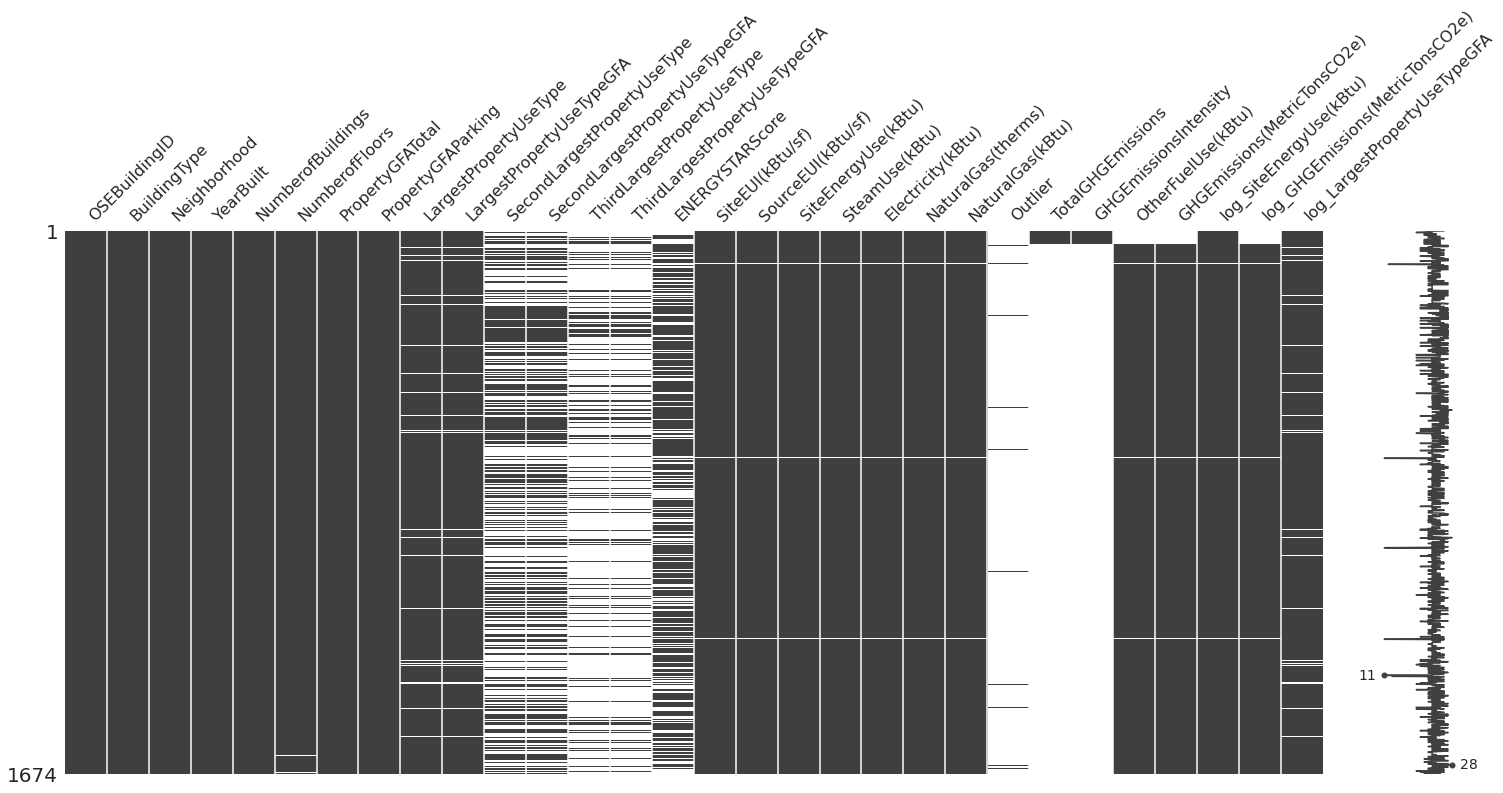

In [ ]:
msno.matrix(data_filt)


In [ ]:
# je drop les colonnes incomplètes >95%nan
for column in data_filt:
  if data_filt[column].isnull().sum()*100.0/len(data_filt) > 95:
    data_filt.drop(column,1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



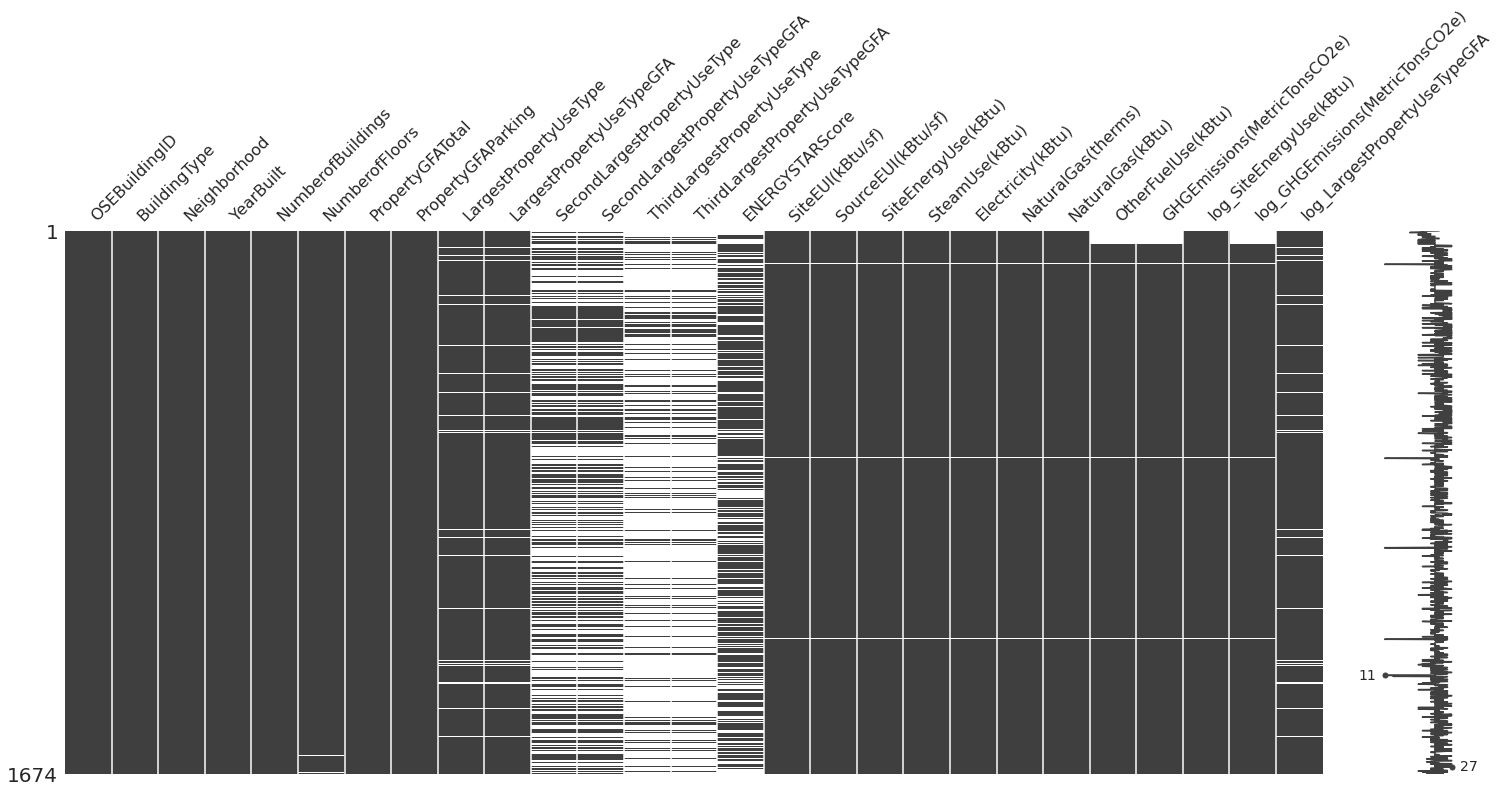

In [ ]:
msno.matrix(data_filt)

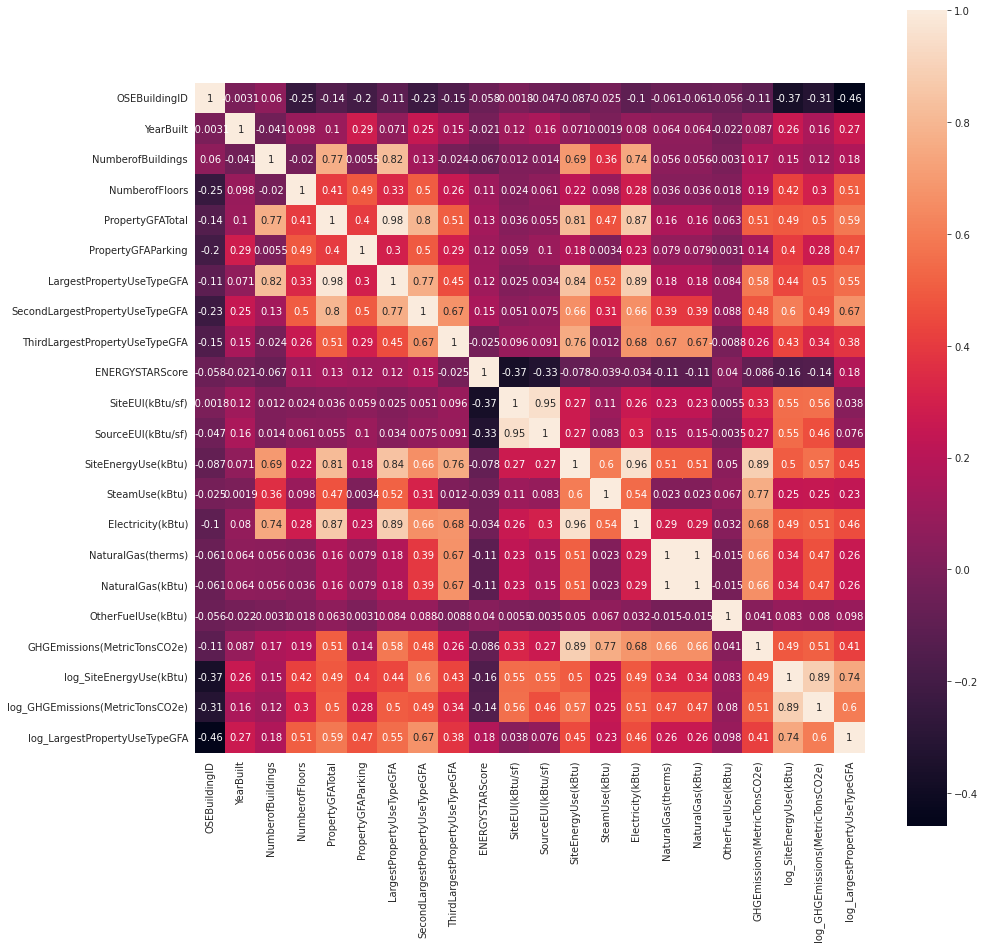

In [ ]:
# Matrice des corrélations
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data_filt.corr(),annot = True, square=True)

 Interprétation de la matrice de corrélations 

1/ largestPropertyGFA est la variable la plus corrélé aux différentes énergies et émissions : droper propertyGFATotal et propertyGFABuildings.Je ne garde que le couple de variables LargestPropertyUseType et  LargestPropertyUseGFA

2/La variable émissions de CO2 est fortement corrélée à l'énergie totale et l'utilisation de la vapeur d'eau.

3/L'énergie totale est fortement corrélée à l'électricité.



Les variables numériques les plus intéressantes pour la prédiction de l'énergie totale et de les émissions de CO2 sont: largestPropertyGFA, steamUse, et NaturalGazUse.

Remarques: 
l'EnergyStarScore n'est corrélé avec aucune varaible! Mais je la concerve car son intérêt est à analyser.

Je retire les doublons des variables énergies: je garde les énergies exprimés en kBtU. 

Je conserve OtherFuel car je vais binariser les types d'énergies. Je vais voir débord comment la variable OtherFuelUse binarisée est corrélée avec les variables Energie totale et émissions de CO2. 

In [ ]:
dataset_variables_overview(data_filt)

--------------------------------------------------------------------------
Data : ['data_filt']
--------------------------------------------------------------------------


Variable name Variable type Distinct  % distinct  \
0                     OSEBuildingID         int64     1674    1.000000   
0                      BuildingType        object        2    0.001195   
0                      Neighborhood        object       14    0.008363   
0                         YearBuilt         int64      113    0.067503   
0                 NumberofBuildings       float64       11    0.006571   
0                    NumberofFloors       float64       45    0.026882   
0                  PropertyGFATotal         int64     1595    0.952808   
0                PropertyGFAParking         int64      344    0.205496   
0            LargestPropertyUseType        object       58    0.034648   
0         LargestPropertyUseTypeGFA       float64     1514    0.904421   
0      SecondLargestPropertyUseType        object       45    0.026882   
0   SecondLargestPropertyUseTypeGFA       float64      684    0.408602   
0       ThirdLargestPropertyUseType        object       37    0.022103   
0    ThirdLargestPropertyUseTypeGFA       float64      293    0.175030   
0                   ENERGYSTARScore       float64      101    0.060335   
0                  SiteEUI(kBtu/sf)       float64      992    0.592593   
0                SourceEUI(kBtu/sf)       float64     1316    0.786141   
0               SiteEnergyUse(kBtu)       float64     1667    0.995818   
0                    SteamUse(kBtu)       float64      117    0.069892   
0                 Electricity(kBtu)       float64     1668    0.996416   
0                NaturalGas(therms)       float64     1177    0.703106   
0                  NaturalGas(kBtu)       float64     1208    0.721625   
0                OtherFuelUse(kBtu)       float64       16    0.009558   
0      GHGEmissions(MetricTonsCO2e)       float64     1548    0.924731   
0           log_SiteEnergyUse(kBtu)       float64     1667    0.995818   
0  log_GHGEmissions(MetricTonsCO2e)       float64     1548    0.924731   
0     log_LargestPropertyUseTypeGFA       float64     1514    0.904421   

  Missing  % missing            Mean     Median            Stdev        min  \
0       0   0.000000    16234.153524    21139.0     13794.758752          1   
0       0   0.000000                                                          
0       0   0.000000                                                          
0       0   0.000000      1961.98865     1966.0        32.830534       1900   
0       0   0.000000        1.130227        1.0         2.901984        1.0   
0       8   0.004779        4.133854        2.0         6.542279        0.0   
0       0   0.000000   119360.673835    49489.5    296822.401674      11285   
0       0   0.000000     13901.51374        0.0     45158.168025          0   
0      64   0.038232                                                          
0      64   0.038232    99079.620497    43369.5    280565.314397     5872.0   
0     847   0.505974                                                          
0     847   0.505974    36727.124547    12353.0     69860.115961        0.0   
0    1333   0.796296                                                          
0    1333   0.796296    14359.405279     5775.0     36767.808555        0.0   
0     545   0.325568       64.065545       72.0         28.62576        1.0   
0       7   0.004182       72.936293  52.200001        73.779738        2.9   
0       7   0.004182      179.133653      133.3       184.856506        0.0   
0       7   0.004182  8587294.959996  2569602.0  30329534.730679    93851.0   
0       7   0.004182   518123.014997        0.0    5303584.21016        0.0   
0       7   0.004182  5983866.056745  1696079.0  20922192.282593       11.0   
0       7   0.004182    19794.353513     4888.0     94228.346911        0.0   
0       7   0.004182  1979435.476314   488836.0   9422835.102981        0.0   
0      51   0.030466    14452.889094        0.0    280864.157684        0.0   
0      51   0.030466      171.068965      49.18      

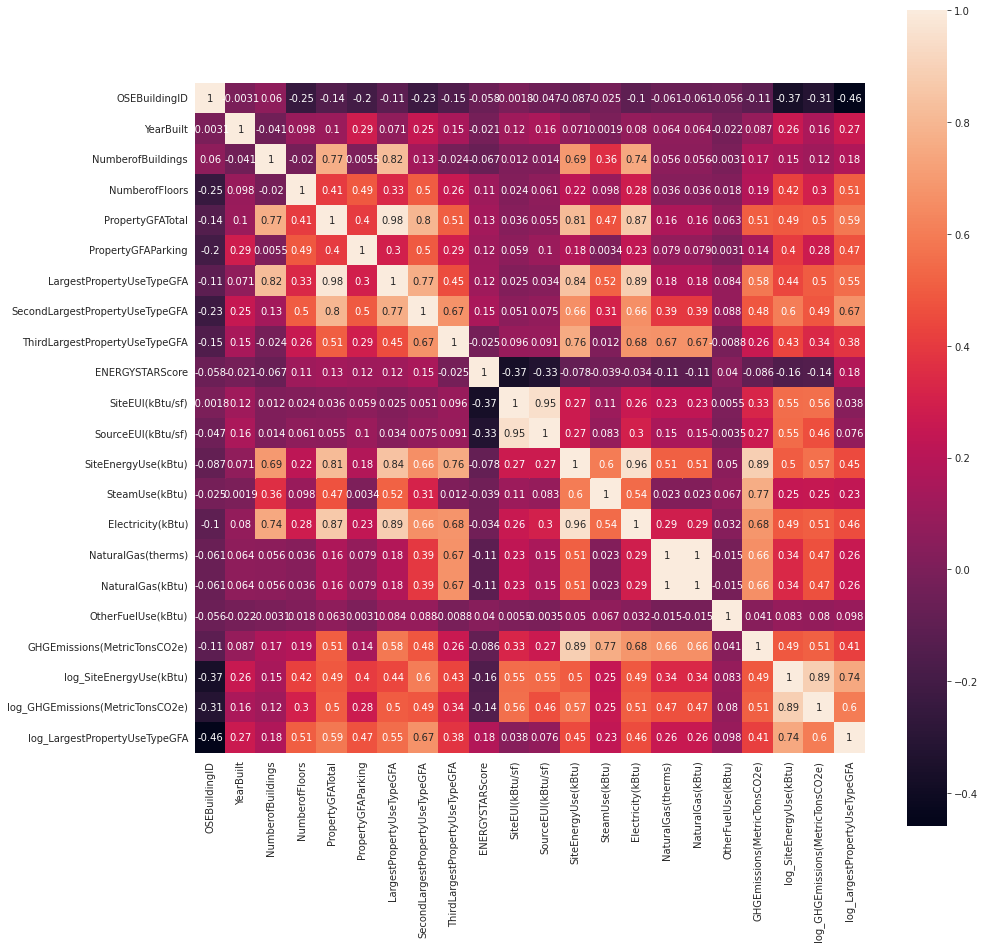

In [ ]:
# Matrice des corrélations des variables sélectionnées
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data_filt.corr(),annot = True, square=True)

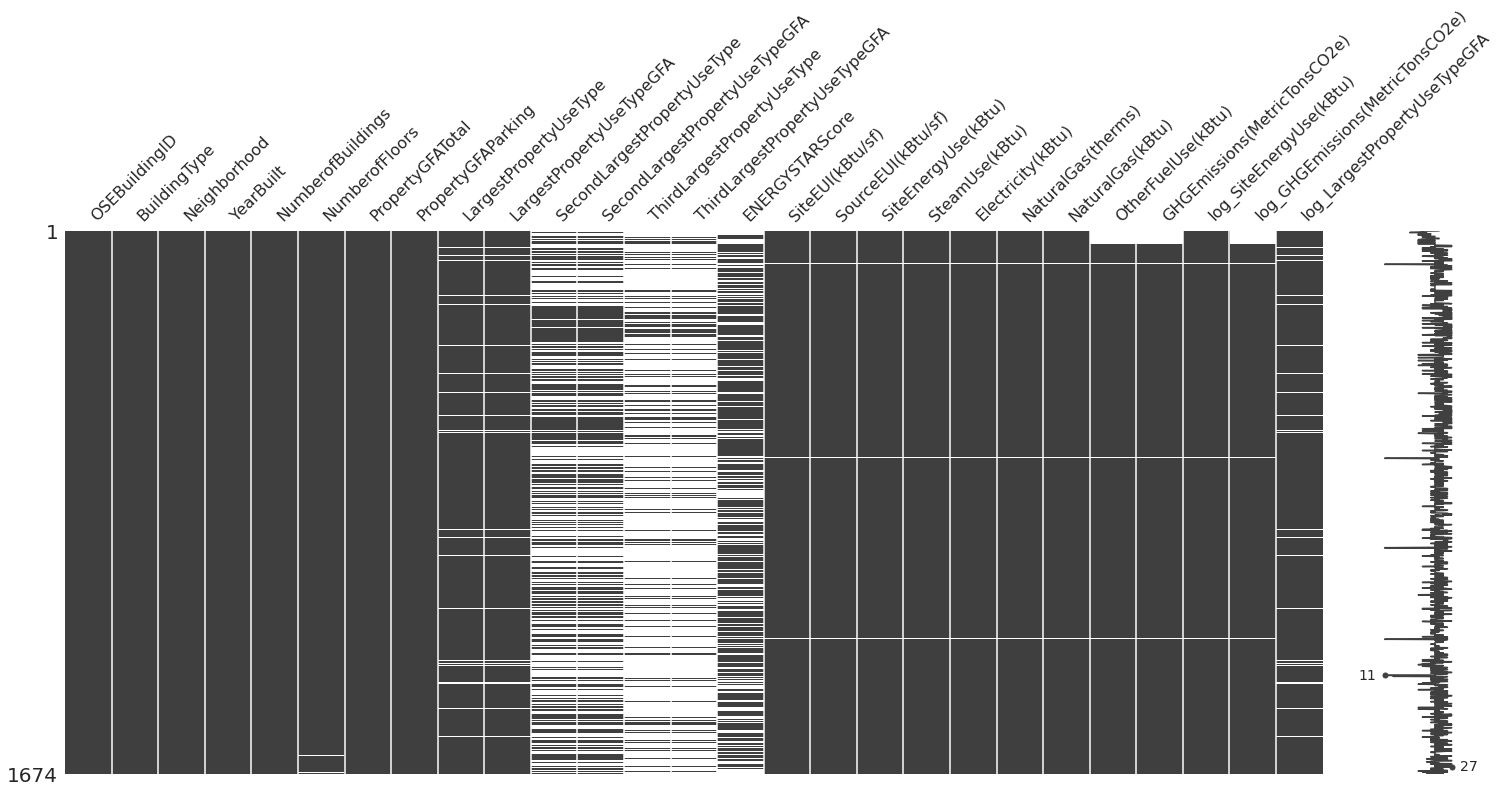

In [ ]:
msno.matrix(data_filt)

In [ ]:
# j'élimine des variables de surface et types de bâtiments qui sont corrélés entre elles. Je ne garde que la plus corrélées avec les données à prédire et l'EnergyStarScore qui est objet de l'analyse
dataset=data_filt[['OSEBuildingID', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors','LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
        'ENERGYSTARScore',  'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'log_SiteEnergyUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)','log_LargestPropertyUseTypeGFA']]

### Discrétisation des variables 
Années de construction 

In [ ]:
#Dicrétisation de la variable année de construction en tranche de 10 ans

for YearBuilt in dataset : 
  dataset["Year_slice"] = pd.qcut(dataset['YearBuilt'], q=12, labels=["1900-1909", "1910-1919", "1920-1929", "1930-1939", "1940-1949", "1950-1959","1960-1969", "1970-1979","1980-1989","1990-1999", "2000-2009", "2010-2019"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Dicrétisation de la variable Nb étages 

for NumberofFloors in dataset : 
  dataset['NbFloors_slice'] = pd.qcut(dataset['NumberofFloors'], q=4, labels=["0-10", "10-20", "20-30", "30-40"]) #enlever rank permet d'avoir une découpe selon la cardinalité de la variable avec des sous-groupes qui suivent la distribution


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset['NumberofBuildings'].value_counts() # la majorité des relevés sont pour des bâtiements uniques. Je discrétise pas.

1.0      1660
7.0         3
3.0         2
6.0         2
111.0       1
11.0        1
16.0        1
4.0         1
39.0        1
2.0         1
10.0        1
Name: NumberofBuildings, dtype: int64

In [ ]:
dataset['NbFloors_slice'].value_counts()



0-10     474
20-30    418
10-20    392
30-40    382
Name: NbFloors_slice, dtype: int64

In [ ]:
dataset["Year_slice"].value_counts()

1940-1949    166
1900-1909    157
1920-1929    151
1990-1999    151
1970-1979    145
2010-2019    136
1950-1959    135
1980-1989    133
1930-1939    130
2000-2009    127
1910-1919    122
1960-1969    121
Name: Year_slice, dtype: int64

### Binariser les variables Energies 

In [ ]:
# Binariser les variables qui renseignent sur l'Utilisation des différentes énergies 
list_var= ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)']

for var in list_var:
  dataset['Bin_'+var]=dataset[var].map(lambda x:1 if x>0 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset['Bin_NaturalGas(kBtu)'].value_counts()

1    1208
0     466
Name: Bin_NaturalGas(kBtu), dtype: int64

In [ ]:
dataset['Bin_Electricity(kBtu)'].value_counts()

1    1667
0       7
Name: Bin_Electricity(kBtu), dtype: int64

J'ai dans mon dataset les variables binarisées repésentant l'utilisation ou non (1 ou 0) des différentes sources d'énergies et j'ai l'énergie totale, les surfaces et les émissions de CO2 transformées en log. 


La binarisation a mis 0 quand c'est nan. On a 7 bâtiments qui ne consomment rien! Les nan seront retirés du dataset de modélisation. 

Je vais l'éliminer du dataset pour la modélisation puisque c'est une variable "invariable" : toujours utilisée et donc toujorus égale à 1

In [ ]:
dataset['LargestPropertyUseTypeGFA'].isnull().sum()
dataset['LargestPropertyUseType'].isnull().sum()

64

 Nettotage final: je drope les nan dans la variable "type de propriétés"(puisqu'on peut voir que les surfaces et les types de propriétés ont autant de null). Je ne veux pas approximer la surface ou le type de bâtiments alors que ce sront deux variables utilisées dans la modélisation. 

In [ ]:
dataset= dataset.dropna(subset=['LargestPropertyUseTypeGFA'])

In [ ]:
dataset=dataset[['OSEBuildingID','LargestPropertyUseType', 'LargestPropertyUseTypeGFA','Neighborhood',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'log_SiteEnergyUse(kBtu)',
       'log_GHGEmissions(MetricTonsCO2e)', 'log_LargestPropertyUseTypeGFA',
       'Year_slice', 'NbFloors_slice', 'Bin_SteamUse(kBtu)',
       'Bin_Electricity(kBtu)', 'Bin_NaturalGas(kBtu)',
       'Bin_OtherFuelUse(kBtu)']]

In [ ]:
data_corr=dataset[['LargestPropertyUseType', 'LargestPropertyUseTypeGFA','Neighborhood',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'log_SiteEnergyUse(kBtu)',
       'log_GHGEmissions(MetricTonsCO2e)', 'log_LargestPropertyUseTypeGFA',
       'Year_slice', 'NbFloors_slice', 'Bin_SteamUse(kBtu)',
       'Bin_Electricity(kBtu)', 'Bin_NaturalGas(kBtu)',
       'Bin_OtherFuelUse(kBtu)']]

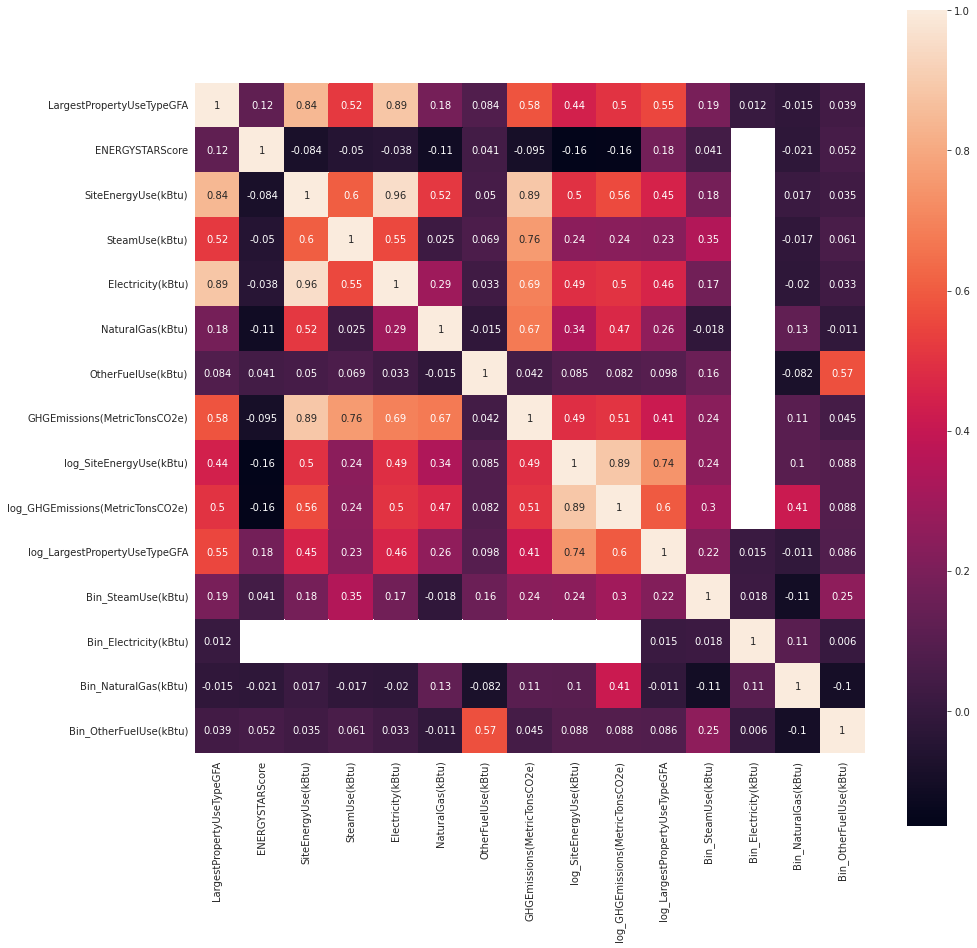

In [ ]:
# Matrice des corrélations
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data_corr.corr(),annot = True, square=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 3426
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   OSEBuildingID                     1610 non-null   int64   
 1   LargestPropertyUseType            1610 non-null   object  
 2   LargestPropertyUseTypeGFA         1610 non-null   float64 
 3   Neighborhood                      1610 non-null   object  
 4   ENERGYSTARScore                   1079 non-null   float64 
 5   SiteEnergyUse(kBtu)               1603 non-null   float64 
 6   SteamUse(kBtu)                    1603 non-null   float64 
 7   Electricity(kBtu)                 1603 non-null   float64 
 8   NaturalGas(kBtu)                  1603 non-null   float64 
 9   OtherFuelUse(kBtu)                1560 non-null   float64 
 10  GHGEmissions(MetricTonsCO2e)      1560 non-null   float64 
 11  log_SiteEnergyUse(kBtu)           1603 non-null   float6

In [ ]:
data_set_overview(dataset)

--------------------------------------------------------------------------
Data : ['dataset']
Nombre de variables (colonnes) : 20
Nombre d observations (lignes) : 1610
Données manquantes en % : 2.25%
Lignes en double : 0
Lignes en double en % : 0.00%


## Analyse univariée

In [ ]:
dataset.describe()

OSEBuildingID  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
count    1610.000000               1.610000e+03      1079.000000   
mean    16334.508075               9.907962e+04        64.216867   
std     13807.377567               2.806525e+05        28.388820   
min         1.000000               5.872000e+03         1.000000   
25%       588.250000               2.550525e+04        47.000000   
50%     21141.500000               4.336950e+04        72.000000   
75%     24596.750000               9.069450e+04        88.000000   
max     50226.000000               9.320156e+06       100.000000   

       SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count         1.603000e+03    1.603000e+03       1.603000e+03   
mean          8.566707e+06    4.901923e+05       5.963958e+06   
std           3.080054e+07    5.267128e+06       2.123126e+07   
min           9.385100e+04    0.000000e+00       1.100000e+01   
25%           1.244316e+06    0.000000e+00       7.541280e+05   
50%           2.547582e+06    0.000000e+00       1.665037e+06   
75%           6.986452e+06    0.000000e+00       5.000064e+06   
max           8.739237e+08    1.278697e+08       6.570744e+08   

       NaturalGas(kBtu)  OtherFuelUse(kBtu)  GHGEmissions(MetricTonsCO2e)  \
count      1.603000e+03        1.560000e+03                   1560.000000   
mean       2.002450e+06        1.503621e+04                    169.234192   
std        9.592944e+06        2.865559e+05                    571.653092   
min        0.000000e+00        0.000000e+00                      1.060000   
25%        0.000000e+00        0.000000e+00                     20.145000   
50%        4.941990e+05        0.000000e+00                     49.060000   
75%        1.499428e+06        0.000000e+00                    138.627500   
max        2.979090e+08        8.269669e+06                  11824.890000   

       log_SiteEnergyUse(kBtu)  log_GHGEmissions(MetricTonsCO2e)  \
count              1603.000000                       1560.000000   
mean                 14.937881                          3.954821   
std                   1.277384                          1.454821   
min                  11.449464                          0.058269   
25%                  14.034096                          3.002955   
50%                  14.750655                          3.893044   
75%                  15.759483                          4.931790   
max                  20.588504                          9.377962   

       log_LargestPropertyUseTypeGFA  Bin_SteamUse(kBtu)  \
count                    1610.000000         1610.000000   
mean                       10.853622            0.067081   
std                         0.971491            0.250240   
min                         8.677951            0.000000   
25%                        10.146640            0.000000   
50%                        10.677511            0.000000   
75%                        11.415250            0.000000   
max                        16.047690            1.000000   

       Bin_Electricity(kBtu)  Bin_NaturalGas(kBtu)  Bin_OtherFuelUse(kBtu)  
count            1610.000000           1610.000000             1610.000000  
mean                0.995652              0.724845                0.008075  
std                 0.065815              0.446731                0.089523  
min                 0.000000              0.000000                0.000000  
25%                 1.000000              0.000000                0.000000  
50%                 1.000000              1.000000                0.000000  
75%                 1.000000              1.000000                0.000000  
max                 1.000000              1.000000                1.000000

### Variable catégorielle ou de tranche (integer ou objet)

In [ ]:
data_filt.BuildingType.unique()

array(['Campus', 'NonResidential'], dtype=object)

In [ ]:
#Utilisation des bâtiments : le non residentiel représente 76% des données 
values=data_filt.BuildingType.value_counts()
labels= data_filt.BuildingType.unique()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, title="Type de bâtiment")])
fig.show()

Classification des bâtiments en 3 groupes de surfaces (GFA): "LargestPropertyUseType"

In [ ]:
dataset.Year_slice.value_counts()

1940-1949    161
1900-1909    152
1990-1999    146
1920-1929    144
1970-1979    139
2010-2019    133
1930-1939    126
1980-1989    126
1950-1959    125
2000-2009    124
1910-1919    117
1960-1969    117
Name: Year_slice, dtype: int64

In [ ]:
import plotly.graph_objects as go

values=dataset.Year_slice.value_counts().sort_values(ascending=True)
labels= dataset.Year_slice
#category_orders={"Year_slice": ["1900-1909", "1910-1919", "1920-1929", "1930-1939", "1940-1949", "1950-1959","1960-1969", "1970-1979","1980-1989","1990-1999", "2000-2009", "2010-2019"]}

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, title="Année de construction")])
fig.show()


### variables de classification des types d'habitations en fonction de la surfce : 3 listes ie 3 découpages en fonction de la surface 

### Variables de classification des bâtiments 

In [ ]:
values=dataset.LargestPropertyUseType.value_counts()
labels= dataset.LargestPropertyUseType

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, title="Largest property Use Type")])
fig.show()


In [ ]:
len(dataset.LargestPropertyUseType.unique())

57

In [ ]:
values=dataset.Neighborhood.value_counts().sort_values(ascending=True)
labels= dataset.Neighborhood.unique()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, title="Quartiers des bâtiments analysés")])
fig.show()

In [ ]:
values=dataset['NbFloors_slice'].value_counts()

labels= dataset['NbFloors_slice'].unique()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, title="Nb étages par construction")])
fig.show()



In [ ]:
values=dataset['Bin_Electricity(kBtu)'].value_counts()
labels= ['oui:1', 'non:0']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, title="Utilisation de l'électricité")])
fig.show()

In [ ]:
dataset['Bin_Electricity(kBtu)'].value_counts()

1    1603
0       7
Name: Bin_Electricity(kBtu), dtype: int64

In [ ]:
values=dataset['Bin_NaturalGas(kBtu)'].value_counts()
labels= ['oui:1', 'non:0']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, title="Utilisation du gaz naturel")])
fig.show()

In [ ]:
[dataset['Bin_NaturalGas(kBtu)'].value_counts()]

[1    1167
 0     443
 Name: Bin_NaturalGas(kBtu), dtype: int64]

In [ ]:
values= [3272, 131]
labels=['non', 'oui']


fig = go.Figure(data=[go.Pie(labels=labels, values=values,  hole=.6, title="Utilisation de la vapeur d'eau")])
fig.show()

In [ ]:
dataset['Bin_SteamUse(kBtu)'].value_counts()

0    1502
1     108
Name: Bin_SteamUse(kBtu), dtype: int64

### Analyse des variables continues et discrètes 

In [ ]:
dataset.describe()

OSEBuildingID  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
count    1610.000000               1.610000e+03      1079.000000   
mean    16334.508075               9.907962e+04        64.216867   
std     13807.377567               2.806525e+05        28.388820   
min         1.000000               5.872000e+03         1.000000   
25%       588.250000               2.550525e+04        47.000000   
50%     21141.500000               4.336950e+04        72.000000   
75%     24596.750000               9.069450e+04        88.000000   
max     50226.000000               9.320156e+06       100.000000   

       SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count         1.603000e+03    1.603000e+03       1.603000e+03   
mean          8.566707e+06    4.901923e+05       5.963958e+06   
std           3.080054e+07    5.267128e+06       2.123126e+07   
min           9.385100e+04    0.000000e+00       1.100000e+01   
25%           1.244316e+06    0.000000e+00       7.541280e+05   
50%           2.547582e+06    0.000000e+00       1.665037e+06   
75%           6.986452e+06    0.000000e+00       5.000064e+06   
max           8.739237e+08    1.278697e+08       6.570744e+08   

       NaturalGas(kBtu)  OtherFuelUse(kBtu)  GHGEmissions(MetricTonsCO2e)  \
count      1.603000e+03        1.560000e+03                   1560.000000   
mean       2.002450e+06        1.503621e+04                    169.234192   
std        9.592944e+06        2.865559e+05                    571.653092   
min        0.000000e+00        0.000000e+00                      1.060000   
25%        0.000000e+00        0.000000e+00                     20.145000   
50%        4.941990e+05        0.000000e+00                     49.060000   
75%        1.499428e+06        0.000000e+00                    138.627500   
max        2.979090e+08        8.269669e+06                  11824.890000   

       log_SiteEnergyUse(kBtu)  log_GHGEmissions(MetricTonsCO2e)  \
count              1603.000000                       1560.000000   
mean                 14.937881                          3.954821   
std                   1.277384                          1.454821   
min                  11.449464                          0.058269   
25%                  14.034096                          3.002955   
50%                  14.750655                          3.893044   
75%                  15.759483                          4.931790   
max                  20.588504                          9.377962   

       log_LargestPropertyUseTypeGFA  Bin_SteamUse(kBtu)  \
count                    1610.000000         1610.000000   
mean                       10.853622            0.067081   
std                         0.971491            0.250240   
min                         8.677951            0.000000   
25%                        10.146640            0.000000   
50%                        10.677511            0.000000   
75%                        11.415250            0.000000   
max                        16.047690            1.000000   

       Bin_Electricity(kBtu)  Bin_NaturalGas(kBtu)  Bin_OtherFuelUse(kBtu)  
count            1610.000000           1610.000000             1610.000000  
mean                0.995652              0.724845                0.008075  
std                 0.065815              0.446731                0.089523  
min                 0.000000              0.000000                0.000000  
25%                 1.000000              0.000000                0.000000  
50%                 1.000000              1.000000                0.000000  
75%                 1.000000              1.000000                0.000000  
max                 1.000000              1.000000                1.000000

In [ ]:
dataset.ENERGYSTARScore.describe()	
# c'est une variable discrète 

count    1079.000000
mean       64.216867
std        28.388820
min         1.000000
25%        47.000000
50%        72.000000
75%        88.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

In [ ]:
dataset.ENERGYSTARScore.skew()

-0.7308471847091341

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



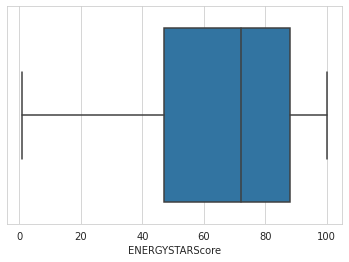

In [ ]:
sns.boxplot(dataset['ENERGYSTARScore'], showfliers=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



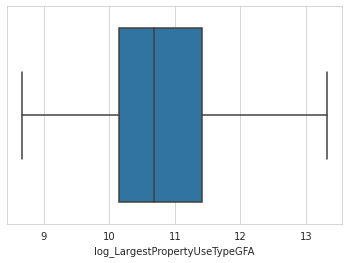

In [ ]:
sns.set_style("whitegrid") 
sns.boxplot(dataset['log_LargestPropertyUseTypeGFA'], showfliers=False)


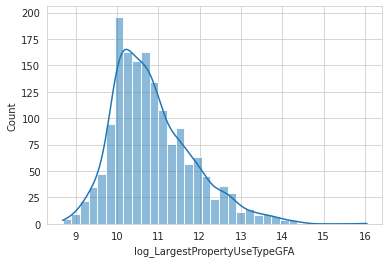

In [ ]:
#distribution de la surface des bâtiments 
sns.histplot(x=dataset['log_LargestPropertyUseTypeGFA'], kde=True)  

In [ ]:
dataset['log_LargestPropertyUseTypeGFA'].skew()

0.9054341263318125

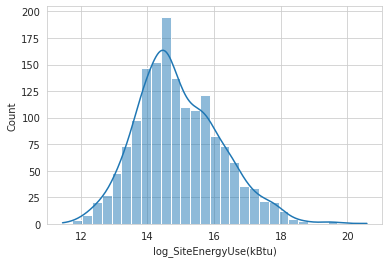

In [ ]:
#distribution de l'énergie consommée 
sns.histplot( x=dataset['log_SiteEnergyUse(kBtu)'], kde=True)

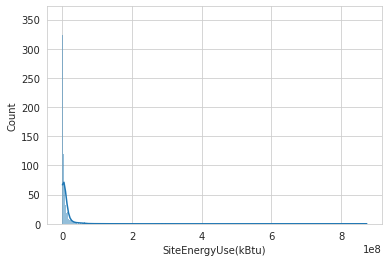

In [ ]:
sns.histplot( x=dataset['SiteEnergyUse(kBtu)'], kde=True)

In [ ]:
dataset['SiteEnergyUse(kBtu)'].describe()

count    1.603000e+03
mean     8.566707e+06
std      3.080054e+07
min      9.385100e+04
25%      1.244316e+06
50%      2.547582e+06
75%      6.986452e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

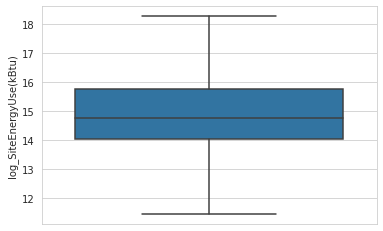

In [ ]:
sns.boxplot(y=dataset['log_SiteEnergyUse(kBtu)'],showfliers=False)

In [ ]:
dataset.describe()

OSEBuildingID  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
count    1610.000000               1.610000e+03      1079.000000   
mean    16334.508075               9.907962e+04        64.216867   
std     13807.377567               2.806525e+05        28.388820   
min         1.000000               5.872000e+03         1.000000   
25%       588.250000               2.550525e+04        47.000000   
50%     21141.500000               4.336950e+04        72.000000   
75%     24596.750000               9.069450e+04        88.000000   
max     50226.000000               9.320156e+06       100.000000   

       SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count         1.603000e+03    1.603000e+03       1.603000e+03   
mean          8.566707e+06    4.901923e+05       5.963958e+06   
std           3.080054e+07    5.267128e+06       2.123126e+07   
min           9.385100e+04    0.000000e+00       1.100000e+01   
25%           1.244316e+06    0.000000e+00       7.541280e+05   
50%           2.547582e+06    0.000000e+00       1.665037e+06   
75%           6.986452e+06    0.000000e+00       5.000064e+06   
max           8.739237e+08    1.278697e+08       6.570744e+08   

       NaturalGas(kBtu)  OtherFuelUse(kBtu)  GHGEmissions(MetricTonsCO2e)  \
count      1.603000e+03        1.560000e+03                   1560.000000   
mean       2.002450e+06        1.503621e+04                    169.234192   
std        9.592944e+06        2.865559e+05                    571.653092   
min        0.000000e+00        0.000000e+00                      1.060000   
25%        0.000000e+00        0.000000e+00                     20.145000   
50%        4.941990e+05        0.000000e+00                     49.060000   
75%        1.499428e+06        0.000000e+00                    138.627500   
max        2.979090e+08        8.269669e+06                  11824.890000   

       log_SiteEnergyUse(kBtu)  log_GHGEmissions(MetricTonsCO2e)  \
count              1603.000000                       1560.000000   
mean                 14.937881                          3.954821   
std                   1.277384                          1.454821   
min                  11.449464                          0.058269   
25%                  14.034096                          3.002955   
50%                  14.750655                          3.893044   
75%                  15.759483                          4.931790   
max                  20.588504                          9.377962   

       log_LargestPropertyUseTypeGFA  Bin_SteamUse(kBtu)  \
count                    1610.000000         1610.000000   
mean                       10.853622            0.067081   
std                         0.971491            0.250240   
min                         8.677951            0.000000   
25%                        10.146640            0.000000   
50%                        10.677511            0.000000   
75%                        11.415250            0.000000   
max                        16.047690            1.000000   

       Bin_Electricity(kBtu)  Bin_NaturalGas(kBtu)  Bin_OtherFuelUse(kBtu)  
count            1610.000000           1610.000000             1610.000000  
mean                0.995652              0.724845                0.008075  
std                 0.065815              0.446731                0.089523  
min                 0.000000              0.000000                0.000000  
25%                 1.000000              0.000000                0.000000  
50%                 1.000000              1.000000                0.000000  
75%                 1.000000              1.000000                0.000000  
max                 1.000000              1.000000                1.000000

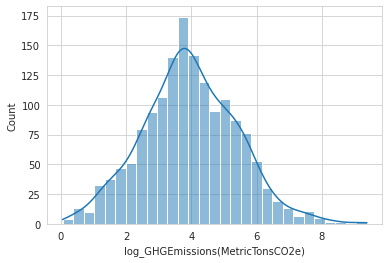

In [ ]:
#distribution des émissions de C02
sns.histplot(x=dataset['log_GHGEmissions(MetricTonsCO2e)'], kde=True)

In [ ]:
dataset['GHGEmissions(MetricTonsCO2e)'].describe()

count     1560.000000
mean       169.234192
std        571.653092
min          1.060000
25%         20.145000
50%         49.060000
75%        138.627500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

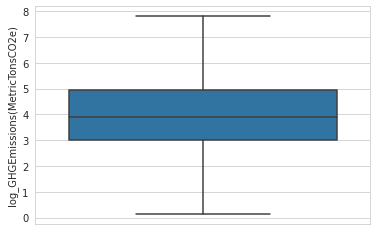

In [ ]:

sns.boxplot(y=dataset['log_GHGEmissions(MetricTonsCO2e)'],showfliers=False)


## Analyse multivariée (dont tests statistiques)


In [ ]:
data_corr=dataset[['LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
        'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)',
       'log_SiteEnergyUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)',
       'log_LargestPropertyUseTypeGFA', 'Year_slice', 'NbFloors_slice',
       'Bin_SteamUse(kBtu)', 'Bin_NaturalGas(kBtu)',
       'Bin_OtherFuelUse(kBtu)']]

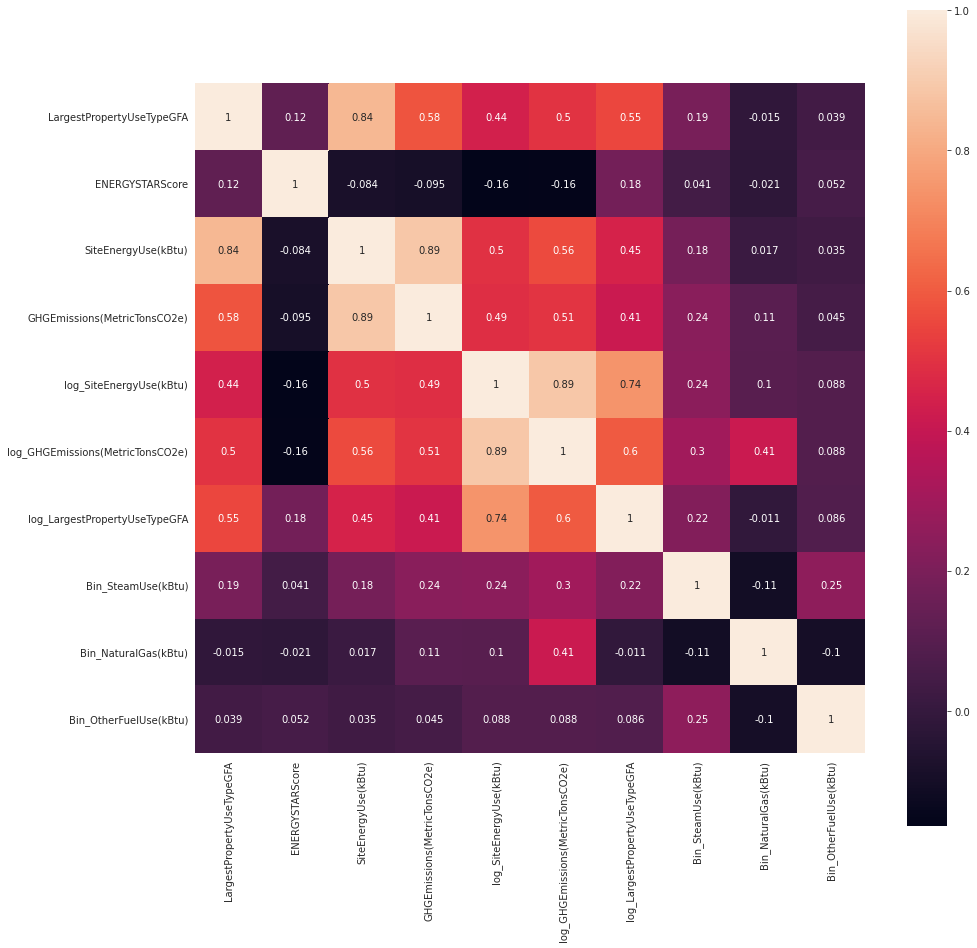

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data_corr.corr(),annot = True, square=True)

Analyse des principales variables en fonction de l'"EnergieStartScore"

[Text(0.5, 1.0, 'Dépense Energie (kBtu)')]

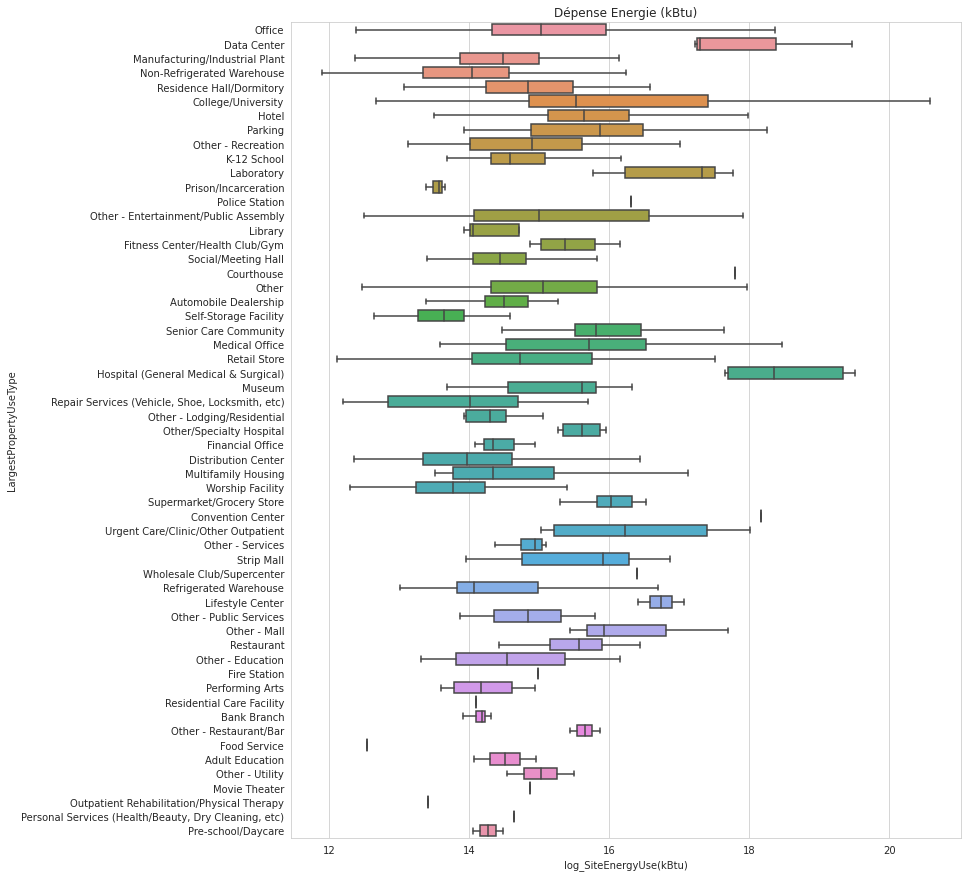

In [ ]:
#Corrélation entre les catégories de bâtiments et la dépense en énergie 
fig, ax = plt.subplots(figsize=(12, 15))
sns.boxplot(data=dataset, y='LargestPropertyUseType', x='log_SiteEnergyUse(kBtu)',ax=ax,orient="h", showfliers=False).set(title='Dépense Energie (kBtu)')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 3426
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   OSEBuildingID                     1610 non-null   int64   
 1   LargestPropertyUseType            1610 non-null   object  
 2   LargestPropertyUseTypeGFA         1610 non-null   float64 
 3   Neighborhood                      1610 non-null   object  
 4   ENERGYSTARScore                   1079 non-null   float64 
 5   SiteEnergyUse(kBtu)               1603 non-null   float64 
 6   SteamUse(kBtu)                    1603 non-null   float64 
 7   Electricity(kBtu)                 1603 non-null   float64 
 8   NaturalGas(kBtu)                  1603 non-null   float64 
 9   OtherFuelUse(kBtu)                1560 non-null   float64 
 10  GHGEmissions(MetricTonsCO2e)      1560 non-null   float64 
 11  log_SiteEnergyUse(kBtu)           1603 non-null   float6

In [ ]:
# corrélation entre la dépense d'énergie et la variable de classification des propriétés ?
df = dataset
aov = pg.anova(dv='log_SiteEnergyUse(kBtu)', between='LargestPropertyUseType', data=df,
               detailed=True)
aov.round(3)

Source        SS    DF      MS       F  p-unc    np2
0  LargestPropertyUseType   816.377    56  14.578  12.538    0.0  0.312
1                  Within  1797.622  1546   1.163     NaN    NaN    NaN

In [ ]:
# corrélation entre l'EnergyStarScore et la variable de classification des bâtiments ?
df = dataset
aov = pg.anova(dv='ENERGYSTARScore', between='LargestPropertyUseType', data=df,
               detailed=True)
aov.round(3)

Source          SS    DF        MS      F  p-unc    np2
0  LargestPropertyUseType  115475.425    25  4619.017  6.457    0.0  0.133
1                  Within  753311.828  1053   715.396    NaN    NaN    NaN

[Text(0.5, 1.0, 'Emissions de CO2 (MetricTonsCO2e) selon le type propriété')]

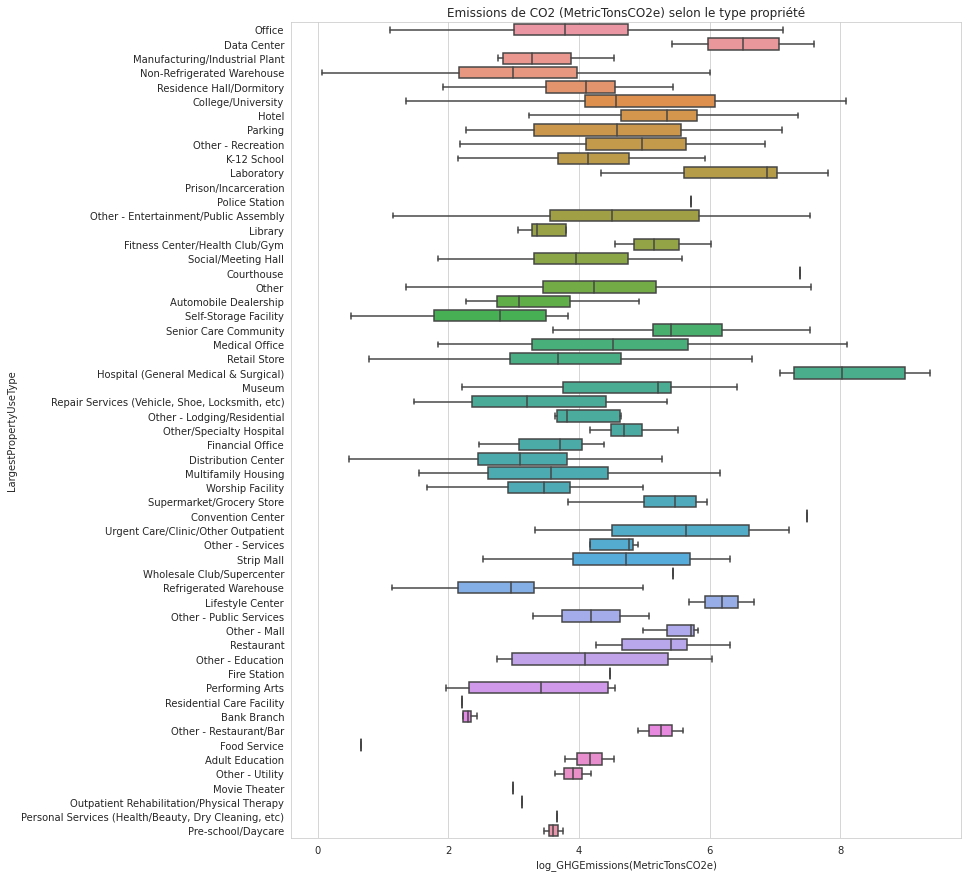

In [ ]:
#Corrélation entre les catégories de bâtiments et la dépense en énergie 
fig = plt.subplots(figsize=(12, 15))
sns.boxplot(data=dataset, y='LargestPropertyUseType', x='log_GHGEmissions(MetricTonsCO2e)',orient="h", showfliers=False).set(title='Emissions de CO2 (MetricTonsCO2e) selon le type propriété')

In [ ]:
# corrélation entre les émissions de CO2 et la variable de classification des propriétés ?
df = dataset
aov = pg.anova(dv='log_GHGEmissions(MetricTonsCO2e)', between='LargestPropertyUseType', data=df,
               detailed=True)
aov.round(3)

Source        SS    DF      MS       F  p-unc    np2
0  LargestPropertyUseType   907.483    55  16.500  10.374    0.0  0.275
1                  Within  2392.145  1504   1.591     NaN    NaN    NaN

Conclusion:
La classification des bâtiments est corrélée à l'énergie totale, l'enregystarscore et les émissions de CO2.
 


Analyse des variable d'utilisation des énergies (Binarisées)


[Text(0.5, 1.0, 'Energie utilisée (kBtu)')]

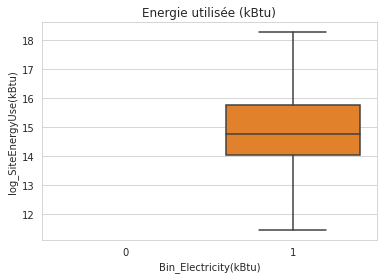

In [ ]:
sns.boxplot(data=dataset, x='Bin_Electricity(kBtu)', y='log_SiteEnergyUse(kBtu)', showfliers=False).set(title='Energie utilisée (kBtu)')


Il n'y a pas de corrélation car la variable Bin_electricity est invariante. 

[Text(0.5, 1.0, 'Energie utilisée (kBtu)')]

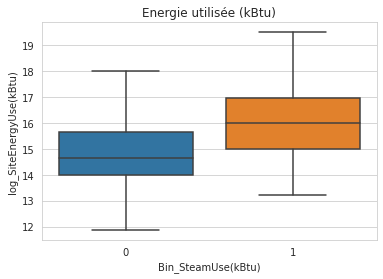

In [ ]:
sns.boxplot(data=dataset, x='Bin_SteamUse(kBtu)', y='log_SiteEnergyUse(kBtu)', showfliers=False).set(title='Energie utilisée (kBtu)')

In [ ]:
#  corrélation entre l'énergie totale et l'utilisation de la vapeur d'eau ? 
df = dataset
aov = pg.anova(dv='log_SiteEnergyUse(kBtu)', between='Bin_SteamUse(kBtu)', data = df, detailed=True)
aov.round(3)

Source        SS    DF       MS       F  p-unc    np2
0  Bin_SteamUse(kBtu)   151.400     1  151.400  98.429    0.0  0.058
1              Within  2462.599  1601    1.538     NaN    NaN    NaN

[Text(0.5, 1.0, 'Emissions de CO2')]

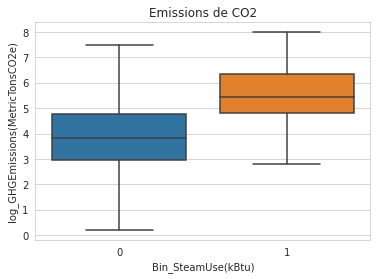

In [ ]:
sns.boxplot(data=dataset, x='Bin_SteamUse(kBtu)', y='log_GHGEmissions(MetricTonsCO2e)', showfliers=False).set(title='Emissions de CO2')


In [ ]:
#  corrélation entre les émissions et l'utilisation de la vapeur d'eau   ? 
df = dataset
aov = pg.anova(dv='log_GHGEmissions(MetricTonsCO2e)', between='Bin_SteamUse(kBtu)', data = df, detailed=True)
aov.round(3)

Source        SS    DF       MS        F  p-unc    np2
0  Bin_SteamUse(kBtu)   299.731     1  299.731  155.665    0.0  0.091
1              Within  2999.897  1558    1.925      NaN    NaN    NaN

[Text(0.5, 1.0, 'Emissions de CO2')]

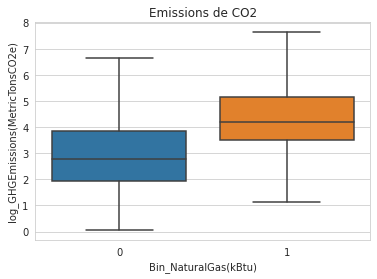

In [ ]:
sns.boxplot(data=dataset, x='Bin_NaturalGas(kBtu)', y='log_GHGEmissions(MetricTonsCO2e)', showfliers=False).set(title='Emissions de CO2')


In [ ]:
#  corrélation entre les émissions et l'utilisation du gaz naturel  ? 
df = dataset
aov = pg.anova(dv='log_GHGEmissions(MetricTonsCO2e)', between='Bin_NaturalGas(kBtu)', data = df, detailed=True)
aov.round(3)

Source        SS    DF       MS        F  p-unc    np2
0  Bin_NaturalGas(kBtu)   567.608     1  567.608  323.692    0.0  0.172
1                Within  2732.019  1558    1.754      NaN    NaN    NaN

[Text(0.5, 1.0, 'Energie utilisée (kBtu)')]

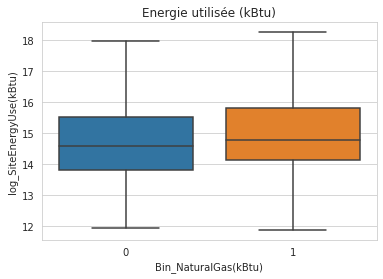

In [ ]:

sns.boxplot(data=dataset, x='Bin_NaturalGas(kBtu)', y='log_SiteEnergyUse(kBtu)', showfliers=False).set(title='Energie utilisée (kBtu)')

In [ ]:
#  corrélation entre l'énergie et l'utilisation du gaz naturel  ? 
df = dataset
aov = pg.anova(dv='log_SiteEnergyUse(kBtu)', between='Bin_NaturalGas(kBtu)', data = df, detailed=True)
aov.round(3)

Source        SS    DF      MS       F  p-unc   np2
0  Bin_NaturalGas(kBtu)    26.796     1  26.796  16.582    0.0  0.01
1                Within  2587.203  1601   1.616     NaN    NaN   NaN

[Text(0.5, 1.0, 'Energie utilisée (kBtu)')]

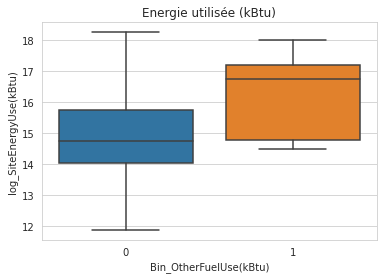

In [ ]:
sns.boxplot(data=dataset, x='Bin_OtherFuelUse(kBtu)', y='log_SiteEnergyUse(kBtu)', showfliers=False).set(title='Energie utilisée (kBtu)')

In [ ]:
#  corrélation entre l'énergie et l'utilisation autre
df = dataset
aov = pg.anova(dv='log_SiteEnergyUse(kBtu)', between='Bin_OtherFuelUse(kBtu)', data = df, detailed=True)
aov.round(3)

Source        SS    DF      MS       F  p-unc    np2
0  Bin_OtherFuelUse(kBtu)    20.066     1  20.066  12.385    0.0  0.008
1                  Within  2593.933  1601   1.620     NaN    NaN    NaN

[Text(0.5, 1.0, 'Energie utilisée (kBtu)')]

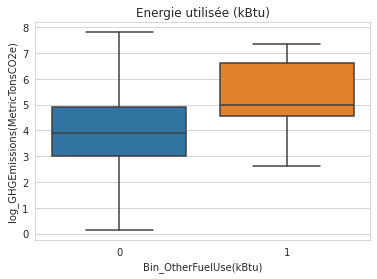

In [ ]:
sns.boxplot(data=dataset, x='Bin_OtherFuelUse(kBtu)', y='log_GHGEmissions(MetricTonsCO2e)', showfliers=False).set(title='Energie utilisée (kBtu)')

In [ ]:
#  corrélation entre l'énergie et autre énergie
df = dataset
aov = pg.anova(dv='log_GHGEmissions(MetricTonsCO2e)', between='Bin_OtherFuelUse(kBtu)', data = df, detailed=True)
aov.round(3)

Source        SS    DF      MS       F  p-unc    np2
0  Bin_OtherFuelUse(kBtu)    25.599     1  25.599  12.182    0.0  0.008
1                  Within  3274.029  1558   2.101     NaN    NaN    NaN

L'utilisation des énergies (variables binarisées) sont corrélées à la consommation totale en énergie et aux émissions, en particulier utilisation du gaz et émissions de CO2. La variable OtherFuel l'est très faiblement. 

Relations entre les variables énergie et émissions avec les années de construction 

[Text(0.5, 1.0, 'Dépense énergie')]

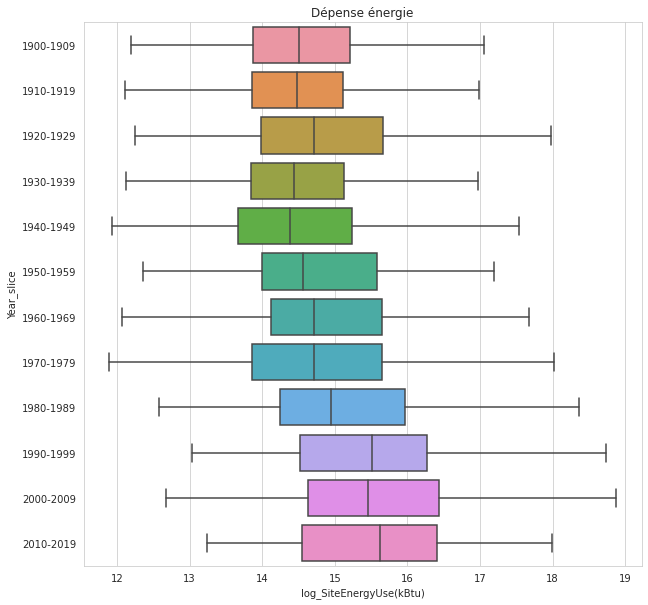

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10)) 

sns.boxplot(data=dataset, y='Year_slice', x='log_SiteEnergyUse(kBtu)',ax=ax, orient="h", showfliers=False).set(title='Dépense énergie')

In [ ]:
# corrélation entre énergie et année de construction ? 
df = dataset
aov = pg.anova(dv='log_SiteEnergyUse(kBtu)', between='Year_slice', data=df,
               detailed=True)
aov.round(3)


Source        SS    DF      MS       F  p-unc    np2
0  Year_slice   249.718    11  22.702  15.277    0.0  0.096
1      Within  2364.281  1591   1.486     NaN    NaN    NaN

Corrélation entre l'énergie dépensée  et année de construction ssi on prend le log de l'énergie!!!

[Text(0.5, 1.0, 'Emissions (MetricTonsCO2e)')]

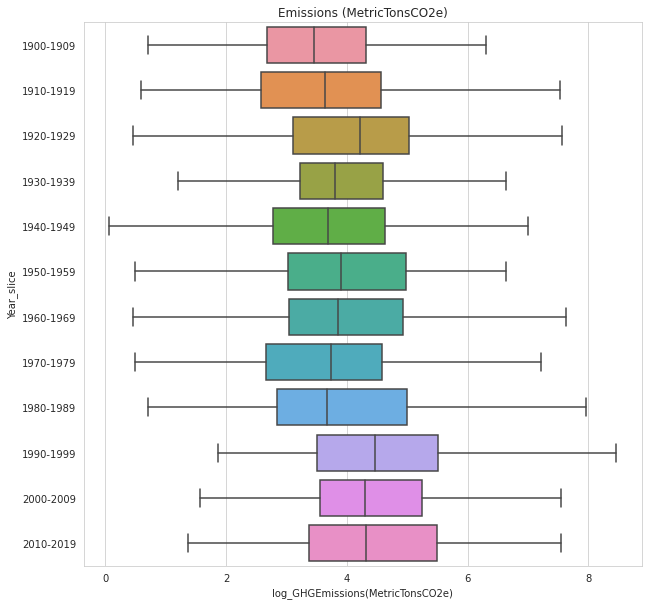

In [ ]:
fig = plt.subplots(figsize=(10, 10)) 

sns.boxplot(data=dataset, y='Year_slice', x='log_GHGEmissions(MetricTonsCO2e)', orient="h", showfliers=False).set(title='Emissions (MetricTonsCO2e)')

In [ ]:
# corrélation entre émissions de CO2 et année de construction ? 
df = dataset
aov = pg.anova(dv='log_GHGEmissions(MetricTonsCO2e)', between='Year_slice', data=df,
               detailed=True)
aov.round(3)


Source        SS    DF      MS      F  p-unc    np2
0  Year_slice   175.502    11  15.955  7.906    0.0  0.053
1      Within  3124.125  1548   2.018    NaN    NaN    NaN

Il existe une corrélation entre l'énergie totale consommée et l'ancienneté des bâtiments ainsi qu'entre les émissions de CO2 et l'ancienneté des bâtiments 

Relation entre les dépenses énergie et les émissions avec le nb d'étages 

[Text(0.5, 1.0, 'GHGEmissions(MetricTonsCO2e)')]

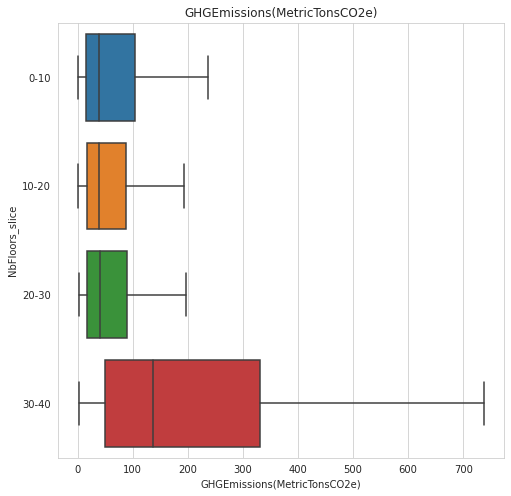

In [ ]:
#Corrélation entre emissions et le nb d'étages 
fig = plt.subplots(figsize=(8,8))
sns.boxplot(data=dataset, y='NbFloors_slice', x='GHGEmissions(MetricTonsCO2e)',orient="h", showfliers=False).set(title='GHGEmissions(MetricTonsCO2e)')

[Text(0.5, 1.0, 'Emissions (MetricTonsCO2e)')]

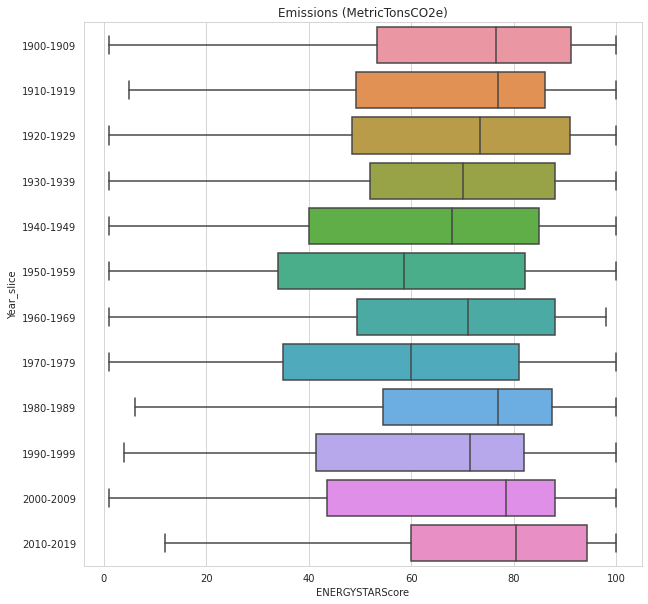

In [ ]:
fig = plt.subplots(figsize=(10, 10)) 

sns.boxplot(data=dataset, y='Year_slice', x='ENERGYSTARScore', orient="h", showfliers=False).set(title='Emissions (MetricTonsCO2e)')

[Text(0.5, 1.0, 'ENERGYSTARSCORE')]

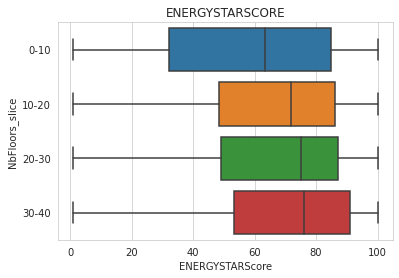

In [ ]:

sns.boxplot(data=dataset, y='NbFloors_slice', x='ENERGYSTARScore',orient="h", showfliers=False).set(title='ENERGYSTARSCORE')

In [ ]:
dataset.columns

Index(['OSEBuildingID', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'Neighborhood', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'log_SiteEnergyUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)',
       'log_LargestPropertyUseTypeGFA', 'Year_slice', 'NbFloors_slice',
       'Bin_SteamUse(kBtu)', 'Bin_Electricity(kBtu)', 'Bin_NaturalGas(kBtu)',
       'Bin_OtherFuelUse(kBtu)'],
      dtype='object')

In [ ]:
 # corrélation entre la dépense d'énergies et le nb d'étages ? 
df = dataset
aov = pg.anova(dv="GHGEmissions(MetricTonsCO2e)", between='NbFloors_slice', data=df,
               detailed=True)
aov.round(3)

Source            SS    DF           MS       F  p-unc    np2
0  NbFloors_slice  2.510575e+07     3  8368584.002  26.782    0.0  0.049
1          Within  4.836967e+08  1548   312465.541     NaN    NaN    NaN

[Text(0.5, 1.0, 'Energie utilisée (kBtu)')]

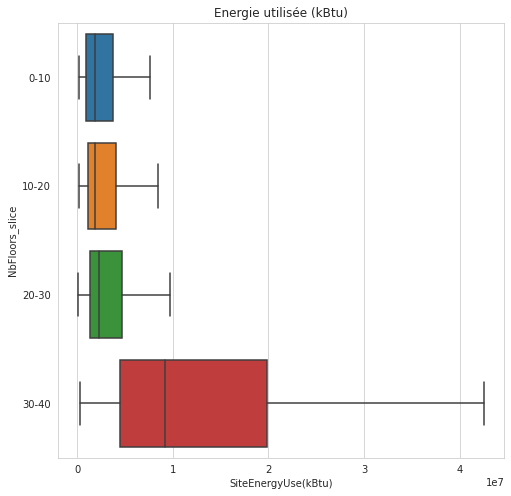

In [ ]:
#Corrélation entre emissions et le nb d'étages 
fig = plt.subplots(figsize=(8,8))

sns.boxplot(data=dataset, y='NbFloors_slice', x="SiteEnergyUse(kBtu)", orient="h", showfliers=False).set(title='Energie utilisée (kBtu)')

In [ ]:
 # corrélation entre la dépense d'énergies et le nb d'étages ? 
df = dataset
aov = pg.anova(dv='SiteEnergyUse(kBtu)', between='NbFloors_slice', data=df,
               detailed=True)
aov.round(3)

Source            SS    DF            MS      F  p-unc    np2
0  NbFloors_slice  5.644957e+16     3  1.881652e+16  20.47    0.0  0.037
1          Within  1.462515e+18  1591  9.192428e+14    NaN    NaN    NaN

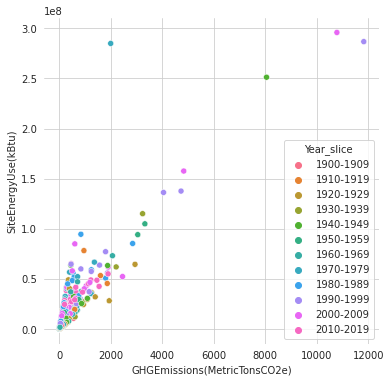

In [ ]:
# Corrélation Energie/Emission CO2
f, ax = plt.subplots(figsize=(6,6))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="GHGEmissions(MetricTonsCO2e)", y="SiteEnergyUse(kBtu)",
                hue="Year_slice", 
                data=dataset.sample(frac=1), ax=ax) #echantillonage à 5% car trop de points

Remarque : la corrélation ancienneté des bâtiments et utilisation des énergies est meilleure avec les varaibles biarisées qu'avec les variables continues 
Corrélation entre ancienneté des bâtiments et les énergies sauf pour l'électricité 

Relations entre les dépenses d'énergies et le quartier (localisation dans Seattle)

[Text(0.5, 1.0, 'Dépense Energie (kBtu) / Quartiers ')]

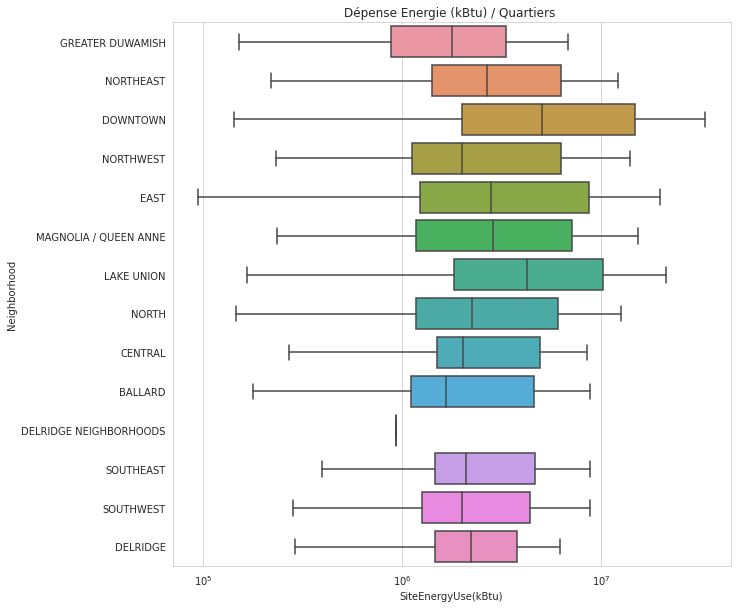

In [ ]:
plt.subplots(figsize=(10, 10))

plt.xscale("log")
sns.boxplot(data=dataset, y="Neighborhood", x='SiteEnergyUse(kBtu)', orient="h", showfliers=False).set(title='Dépense Energie (kBtu) / Quartiers ')

In [ ]:
 # corrélation entre la dépense d'énergies et le quartier ? 
df = dataset
aov = pg.anova(dv='SiteEnergyUse(kBtu)', between="Neighborhood", data=df,
               detailed=True)
aov.round(3)
#Corrélé mais np2 très faible

Source            SS    DF            MS      F  p-unc    np2
0  Neighborhood  2.285773e+16    13  1.758287e+15  1.866   0.03  0.015
1        Within  1.496917e+18  1589  9.420496e+14    NaN    NaN    NaN

[Text(0.5, 1.0, 'GHGEmissions(MetricTonsCO2e)')]

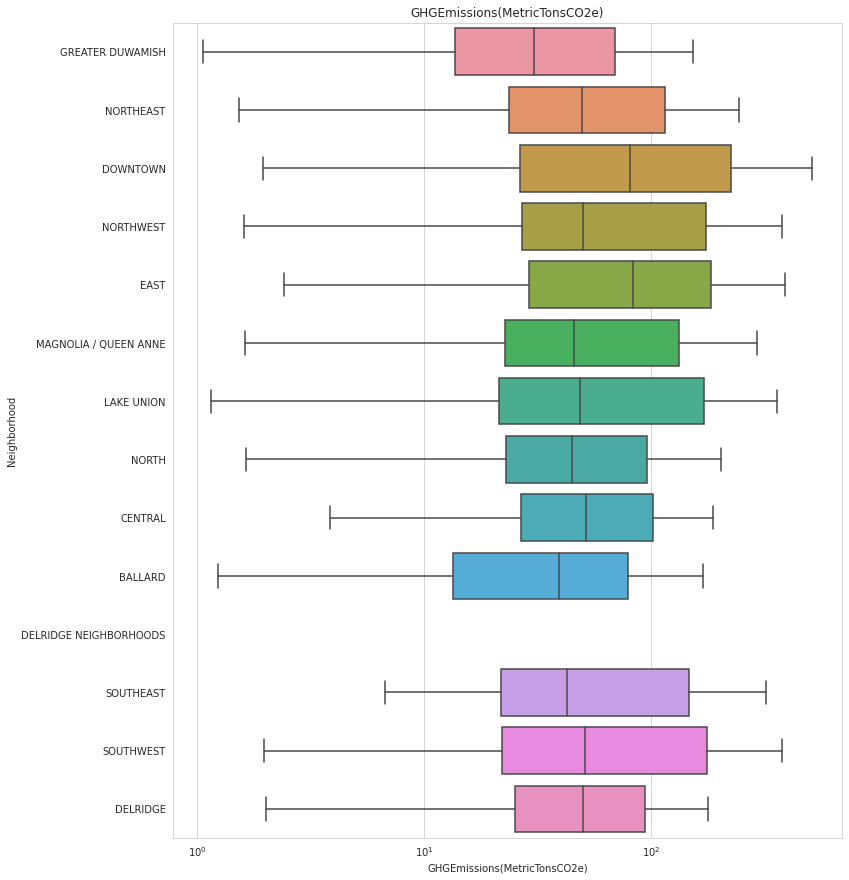

In [ ]:
#Corrélation entre emissions et quartiers 
fig = plt.subplots(figsize=(12, 15))

plt.xscale("log")
sns.boxplot(data=dataset, y="Neighborhood", x='GHGEmissions(MetricTonsCO2e)',orient="h", showfliers=False).set(title='GHGEmissions(MetricTonsCO2e)')

[Text(0.5, 1.0, 'GHGEmissions(MetricTonsCO2e)')]

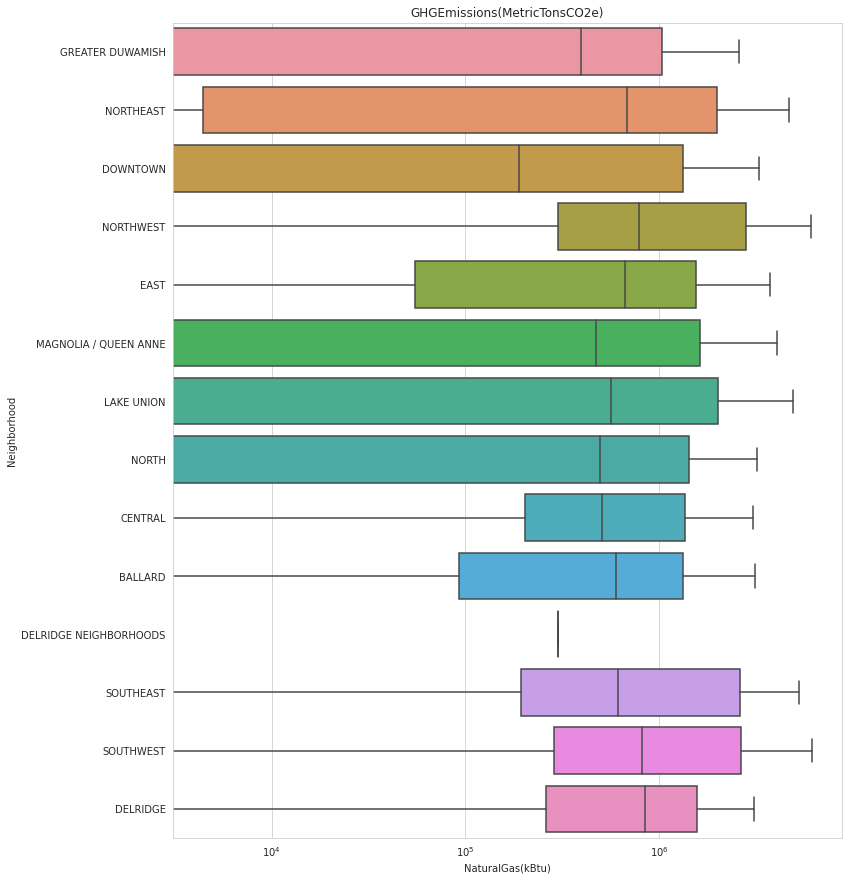

In [ ]:
#Corrélation entre emissions et quartiers 
fig = plt.subplots(figsize=(12, 15))

plt.xscale("log")
sns.boxplot(data=dataset, y="Neighborhood", x='NaturalGas(kBtu)',orient="h", showfliers=False).set(title='GHGEmissions(MetricTonsCO2e)')

In [ ]:
# corrélation entre Emissions  et les quartiers ? 
df = dataset
aov = pg.anova(dv='log_GHGEmissions(MetricTonsCO2e)', between="Neighborhood",  data=df,
               detailed=True)
aov.round(3)
#Corrélé mais np2 très faible

Source        SS    DF      MS      F  p-unc    np2
0  Neighborhood   203.626    12  16.969  8.479    0.0  0.062
1        Within  3096.001  1547   2.001    NaN    NaN    NaN

In [ ]:
# corrélation entre Emissions  et les quartiers ? 
df = dataset
aov = pg.anova(dv='Bin_NaturalGas(kBtu)', between="Neighborhood",  data=df,
               detailed=True)
aov.round(3)
#Corrélé mais np2 très faible

Source       SS    DF     MS      F  p-unc    np2
0  Neighborhood    9.004    13  0.693  3.542    0.0  0.028
1        Within  312.102  1596  0.196    NaN    NaN    NaN

La localisation du bâtiment est faiblement corrélée à la dépense d' énergie et aux émissions 

### Emissions de CO2 selon le type d'énergie consommée

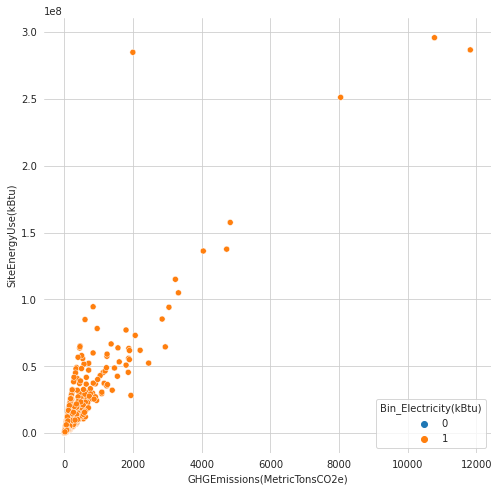

In [ ]:
# Corrélation Energie/Emission CO2
f, ax = plt.subplots(figsize=(8,8))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="GHGEmissions(MetricTonsCO2e)", y="SiteEnergyUse(kBtu)",
                hue='Bin_Electricity(kBtu)',
                data=dataset.sample(frac=1), ax=ax) 

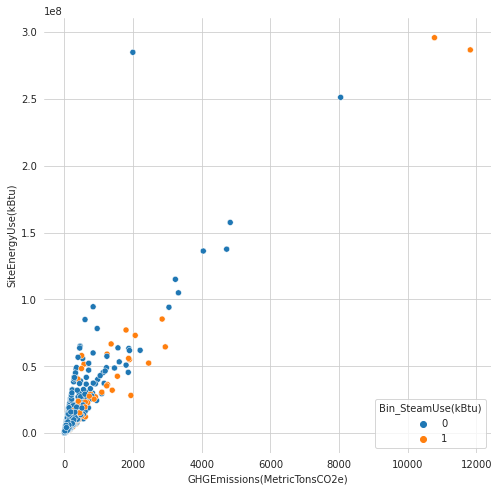

In [ ]:
# Corrélation Steam/Emission CO2
f, ax = plt.subplots(figsize=(8,8))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="GHGEmissions(MetricTonsCO2e)", y="SiteEnergyUse(kBtu)",
                hue='Bin_SteamUse(kBtu)',
                data=dataset.sample(frac=1), ax=ax) 

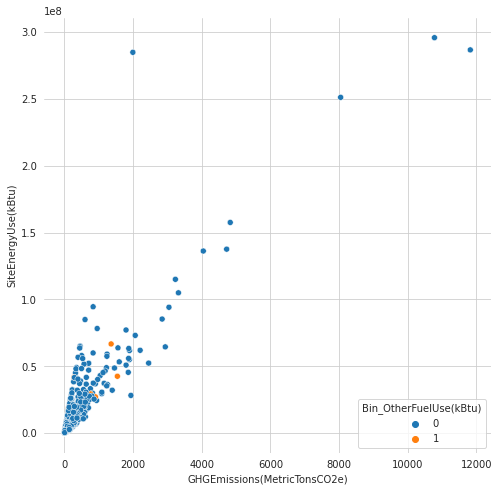

In [ ]:
# Corrélation Energie/Emission CO2
f, ax = plt.subplots(figsize=(8,8))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="GHGEmissions(MetricTonsCO2e)", y="SiteEnergyUse(kBtu)",
                hue='Bin_OtherFuelUse(kBtu)',
                data=dataset.sample(frac=1),ax=ax) 

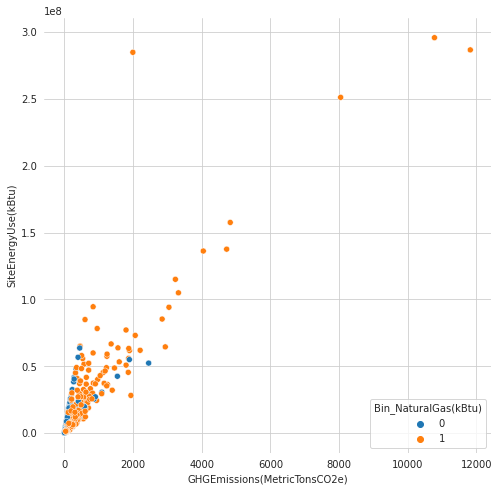

In [ ]:

# Corrélation Gaz/Emission CO2
f, ax = plt.subplots(figsize=(8,8))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="GHGEmissions(MetricTonsCO2e)", y="SiteEnergyUse(kBtu)",
                hue='Bin_NaturalGas(kBtu)',
                data=dataset.sample(frac=1), ax=ax) 

### Corrélations des variables

In [ ]:
from scipy.stats import pearsonr


In [ ]:
len(dataset.columns)

20

In [ ]:
dataset.columns

Index(['OSEBuildingID', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'Neighborhood', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'log_SiteEnergyUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)',
       'log_LargestPropertyUseTypeGFA', 'Year_slice', 'NbFloors_slice',
       'Bin_SteamUse(kBtu)', 'Bin_Electricity(kBtu)', 'Bin_NaturalGas(kBtu)',
       'Bin_OtherFuelUse(kBtu)'],
      dtype='object')

In [ ]:
#dataset pd.read_csv("/content/drive/MyDrive/Projet4_ConsoElec/dataset_E.csv")
dataset.to_csv("/content/drive/MyDrive/Projet4_ConsoElec/dataset.csv", index=False)

In [ ]:
dataset_E= dataset[['LargestPropertyUseType', 'log_LargestPropertyUseTypeGFA',
       'Bin_SteamUse(kBtu)', 'Bin_NaturalGas(kBtu)',
       'Bin_OtherFuelUse(kBtu)', 
       'log_SiteEnergyUse(kBtu)',  'log_GHGEmissions(MetricTonsCO2e)',
       'Neighborhood', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'log_SiteEnergyUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)',
       'log_LargestPropertyUseTypeGFA', 'Year_slice', 'NbFloors_slice',
       'Bin_SteamUse(kBtu)', 'Bin_Electricity(kBtu)', 'Bin_NaturalGas(kBtu)',
       'Bin_OtherFuelUse(kBtu)']]

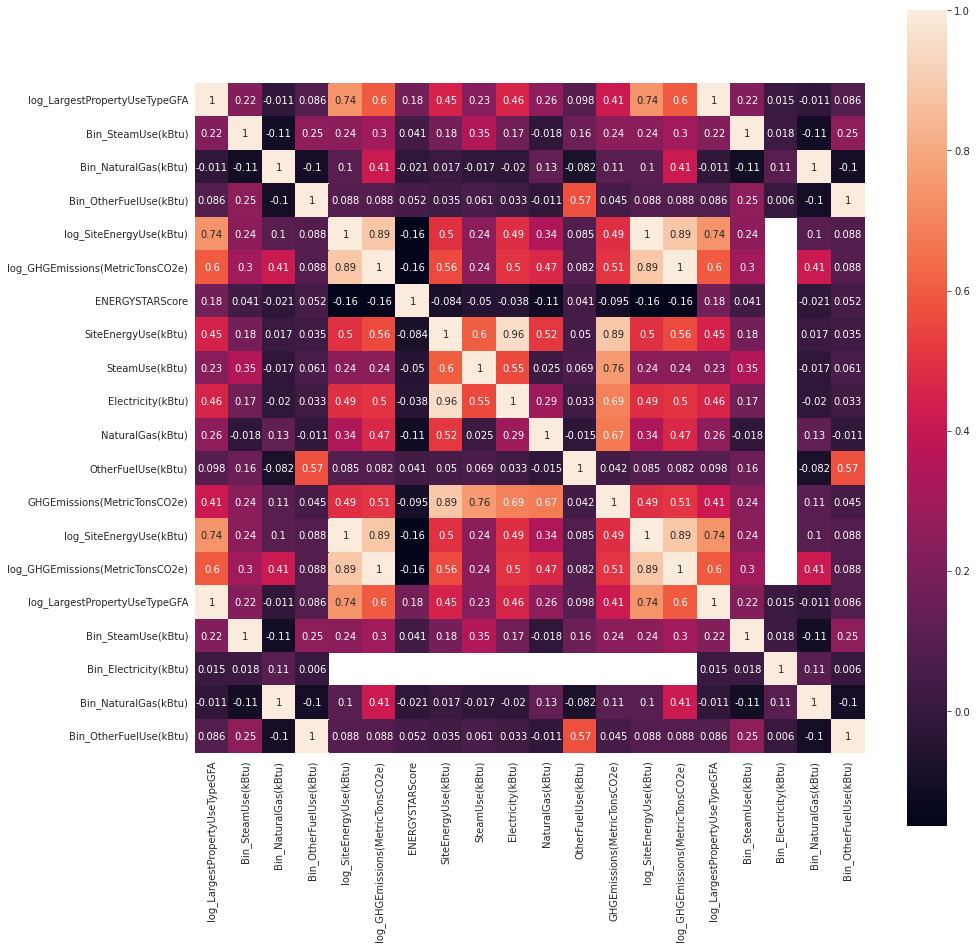

In [ ]:
# Matrice des corrélations
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(dataset_E.corr(),annot = True, square=True)

In [ ]:
data=dataset[['LargestPropertyUseType', 'log_LargestPropertyUseTypeGFA',
       'Bin_SteamUse(kBtu)', 'Bin_NaturalGas(kBtu)',
       'Bin_OtherFuelUse(kBtu)', 
       'log_SiteEnergyUse(kBtu)',  'log_GHGEmissions(MetricTonsCO2e)']]

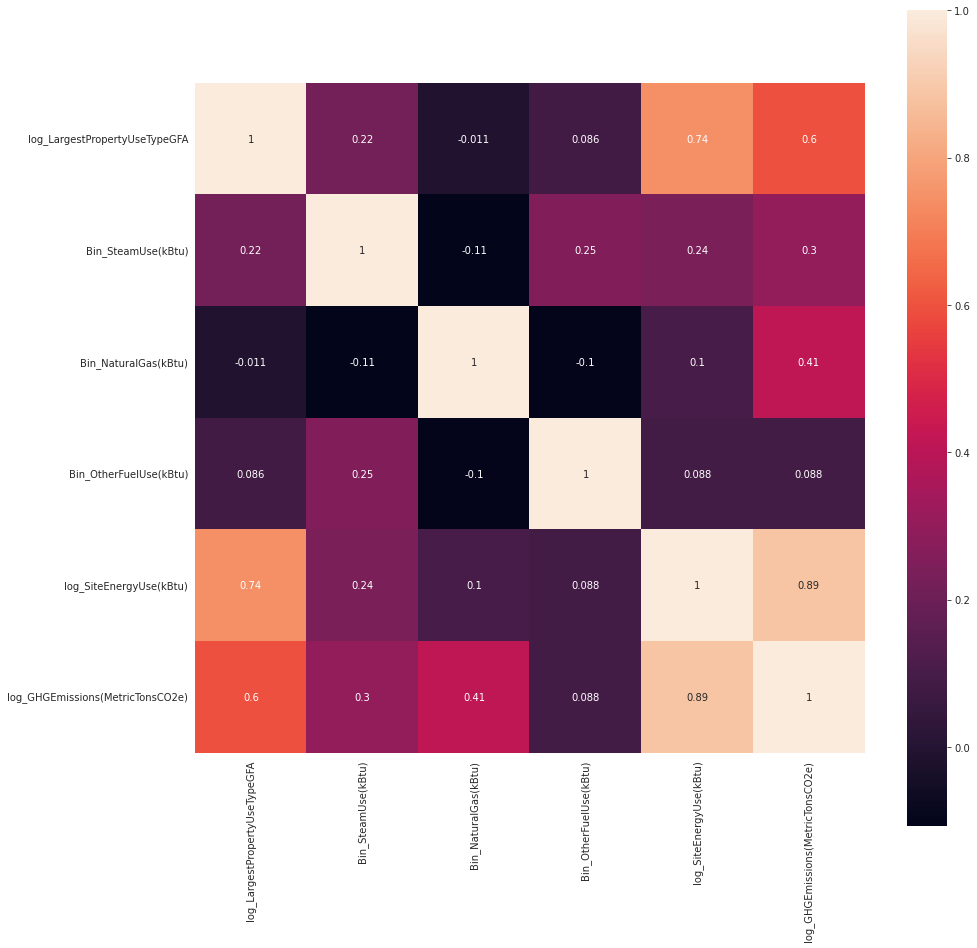

In [ ]:
# Matrice des corrélations
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data.corr(),annot = True, square=True)

In [ ]:
dataset_E.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 3426
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   LargestPropertyUseType            1610 non-null   object  
 1   log_LargestPropertyUseTypeGFA     1610 non-null   float64 
 2   Bin_SteamUse(kBtu)                1610 non-null   int64   
 3   Bin_NaturalGas(kBtu)              1610 non-null   int64   
 4   Bin_OtherFuelUse(kBtu)            1610 non-null   int64   
 5   log_SiteEnergyUse(kBtu)           1603 non-null   float64 
 6   log_GHGEmissions(MetricTonsCO2e)  1560 non-null   float64 
 7   Neighborhood                      1610 non-null   object  
 8   ENERGYSTARScore                   1079 non-null   float64 
 9   SiteEnergyUse(kBtu)               1603 non-null   float64 
 10  SteamUse(kBtu)                    1603 non-null   float64 
 11  Electricity(kBtu)                 1603 non-null   float6

In [ ]:
dataset_E.dropna(0, inplace=True) # comme j'uilise ce dataset pour la régression je préfère droper les données manquantes plutôt que les approximer 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset_E.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 92 to 3426
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   LargestPropertyUseType            1058 non-null   object  
 1   log_LargestPropertyUseTypeGFA     1058 non-null   float64 
 2   Bin_SteamUse(kBtu)                1058 non-null   int64   
 3   Bin_NaturalGas(kBtu)              1058 non-null   int64   
 4   Bin_OtherFuelUse(kBtu)            1058 non-null   int64   
 5   log_SiteEnergyUse(kBtu)           1058 non-null   float64 
 6   log_GHGEmissions(MetricTonsCO2e)  1058 non-null   float64 
 7   Neighborhood                      1058 non-null   object  
 8   ENERGYSTARScore                   1058 non-null   float64 
 9   SiteEnergyUse(kBtu)               1058 non-null   float64 
 10  SteamUse(kBtu)                    1058 non-null   float64 
 11  Electricity(kBtu)                 1058 non-null   float

In [ ]:
data_set_overview(dataset_E)

--------------------------------------------------------------------------
Data : ['dataset_E']
Nombre de variables (colonnes) : 24
Nombre d observations (lignes) : 1058
Données manquantes en % : 0.00%
Lignes en double : 0
Lignes en double en % : 0.00%


In [ ]:
dataset_E.describe()

log_LargestPropertyUseTypeGFA  Bin_SteamUse(kBtu)  \
count                    1058.000000         1058.000000   
mean                       10.981178            0.067108   
std                         0.920919            0.250327   
min                         8.994793            0.000000   
25%                        10.266410            0.000000   
50%                        10.809132            0.000000   
75%                        11.508224            0.000000   
max                        14.334862            1.000000   

       Bin_NaturalGas(kBtu)  Bin_OtherFuelUse(kBtu)  log_SiteEnergyUse(kBtu)  \
count           1058.000000             1058.000000              1058.000000   
mean               0.705104                0.002836                14.938536   
std                0.456212                0.053199                 1.241972   
min                0.000000                0.000000                11.888433   
25%                0.000000                0.000000                14.081625   
50%                1.000000                0.000000                14.744098   
75%                1.000000                0.000000                15.781503   
max                1.000000                1.000000                19.505237   

       log_GHGEmissions(MetricTonsCO2e)  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
count                       1058.000000      1058.000000         1.058000e+03   
mean                           3.924448        64.224008         7.736672e+06   
std                            1.425106        28.328488         2.060270e+07   
min                            0.058269         1.000000         1.455730e+05   
25%                            2.980872        47.000000         1.304886e+06   
50%                            3.889058        71.500000         2.530934e+06   
75%                            4.900832        88.000000         7.141995e+06   
max                            9.377962       100.000000         2.958126e+08   

       SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
count    1.058000e+03       1.058000e+03      1.058000e+03   
mean     4.942722e+05       5.608550e+06      1.631100e+06   
std      5.742070e+06       1.446247e+07      6.041153e+06   
min      0.000000e+00       1.058000e+04      0.000000e+00   
25%      0.000000e+00       7.843752e+05      0.000000e+00   
50%      0.000000e+00       1.769902e+06      4.290805e+05   
75%      0.000000e+00       5.314935e+06      1.322673e+06   
max      1.278697e+08       2.847263e+08      1.364484e+08   

       OtherFuelUse(kBtu)  GHGEmissions(MetricTonsCO2e)  \
count        1.058000e+03                   1058.000000   
mean         4.026587e+03                    163.877231   
std          9.262964e+04                    628.363963   
min          0.000000e+00                      1.060000   
25%          0.000000e+00                     19.705000   
50%          0.000000e+00                     48.865000   
75%          0.000000e+00                    134.402500   
max          2.304567e+06                  11824.890000   

       log_SiteEnergyUse(kBtu)  log_GHGEmissions(MetricTonsCO2e)  \
count              1058.000000                       1058.000000   
mean                 14.938536                          3.924448   
std                   1.241972                          1.425106   
min                  11.888433                          0.058269   
25%                  14.081625                          2.980872   
50%                  14.744098                          3.889058   
75%                  15.781503                          4.900832   
max                  19.505237                          9.377962   

       log_LargestPropertyUseTypeGFA  Bin_SteamUse(kBtu)  \
count                    1058.000000         1058.000000   
mean                       10.981178            0.067108   
std                         0.920919            0.250327   
min                         8.994793            0.000000   
25%        

In [ ]:
#Corrélation émissionsCO2/Energie
sns.set_theme(color_codes=True)

ax=sns.regplot(x="log_GHGEmissions(MetricTonsCO2e)", y='log_SiteEnergyUse(kBtu)', data=dataset_E)
#on va prédire les emissions à partir de l'énergie (r=0.89)

ValueError: ignored

In [ ]:
X=dataset_E["log_GHGEmissions(MetricTonsCO2e)"]
Y=dataset_E['log_SiteEnergyUse(kBtu)']
corr, _ = pearsonr(X, Y)
print(corr)

In [ ]:
#Corrélation Surface/Energie
sns.set_theme(color_codes=True)
ax=sns.regplot(x= 'log_LargestPropertyUseTypeGFA', y='log_SiteEnergyUse(kBtu)', data=dataset_E)


In [ ]:
X=dataset_E['log_LargestPropertyUseTypeGFA']
Y=dataset_E['log_SiteEnergyUse(kBtu)']
corr, _ = pearsonr(X, Y)
print(corr)

In [ ]:
#Corrélation Gaz/Energie
sns.set_theme(color_codes=True)

sns.regplot(x='NaturalGas(kBtu)', y='SiteEnergyUse(kBtu)', data=dataset)
#la variable steamUse peut aider à prédire l'énergie tout comme le gaz et la surface 

In [ ]:
#Corrélation 
sns.set_theme(color_codes=True)
ax=sns.regplot(x='SiteEnergyUse(kBtu)', y="GHGEmissions(MetricTonsCO2e)", data=dataset_E)


In [ ]:
X=dataset_E['SiteEnergyUse(kBtu)']
Y=dataset_E["GHGEmissions(MetricTonsCO2e)"]
corr, _ = pearsonr(X, Y)
print(corr)

In [ ]:
#Corrélation 

ax=sns.regplot(y='log_LargestPropertyUseTypeGFA', x="log_GHGEmissions(MetricTonsCO2e)", data=dataset_E)


In [ ]:
X=dataset_E['log_LargestPropertyUseTypeGFA']
Y=dataset_E["log_GHGEmissions(MetricTonsCO2e)"]
corr, _ = pearsonr(X, Y)
print(corr)

Interprétations : Les analyses statistiques et les corrélations me permettent d'établir une liste de variables importantes dans la modélisation des consommations d'néergie et prédictions des émissions de CO2. 

Modèle énergie totale: L'énergie est corrélée à la surface et aux nb d'étges des bâtiments ainsi qu' aux dépenses d'énergies (électricité, gaz et vapeur d'eau). Ces énergies sont binarisées puisqu'on est censé ne pas connaître leur valeurs futures. La binarisation permet de se baser sur la ou les différentes sources d'énergie utilisée par les bâtiments. 


Les variables non numériques sont encodées pour la modélisation
Les énergies sont binarisées. Cela abolit l'importance de l'électricité dans le model énergie car plus de 99,7% des bâtiments utilisent l'électricité.
 
Modèle émissions de CO2:Les émissions de CO2 dépendent de l'énergie consommée. Ce sont les mêmes variables que pour le modèle de prédiction de l'énergie qui sont corrélées aux émissions de CO2. Ce sont juste les intensités de corrélation qui varient. 

Remarque: L'EnergyStarScore n'est corrélée à aucune variable comme le montrait la matrice des corrélations. On evaluera son importance dans le modèle de prédiction des émissions de CO2. 
L'intensité de la relation entre dépenses énergies ou les émissions de C02 avec la variable neighboord est faible (np2=0,012, np2=0,015). je ne conserve pas cette variable pour la modélisation car son encodage est complexe. 


In [ ]:
dataset_E.info()

In [ ]:
#j'enregistre ce dataset pour passer au Notebook modélisation
dataset_E.to_csv(r"C:\Users\33622\Documents\Projet4_ConsoElec\dataset_E.csv",index=False)